# Research data supporting "Accurate and efficient structure factors in ultrasoft pseudopotential and projector augmented wave DFT"

This notebook accompanies our paper: **Accurate and efficient structure factors in ultrasoft pseudopotential and projector augmented wave DFT**. It can be found on GitHub at https://github.com/benshi97/Data_XRD_Structure_Factor and explored interactively on [Colab](https://colab.research.google.com/github/benshi97/Data_XRD_Structure_Factor/blob/main/analyse.ipynb).

### Abstract

Structure factors obtained from diffraction experiments are one of the most important quantities for characterizing the electronic and structural properties of materials. Methods for calculating this quantity from plane-wave density functional theory (DFT) codes are typically prohibitively expensive to perform, requiring the electron density to be constructed and evaluated on dense real-space grids. Making use of the projector functions found in both the Vanderbilt ultrasoft pseudopotential and projector augmented wave methods, we implement an approach to calculate structure factors which avoids the use of a dense grid by separating the rapidly changing contributions to the electron density and treating them on logarithmic radial grids. This approach is successfully validated against structure factors obtained from all-electron DFT and experiment for three prototype systems, allowing structure factors to be obtained at all-electron accuracy at a fraction of the cost of previous approaches for plane-wave DFT.

In [3]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB == True:
    !rm -rf /content/Data_XRD_Structure_Factor-main /content/main.zip
    !wget https://github.com/benshi97/Data_XRD_Structure_Factor/archive/refs/heads/main.zip
    !unzip /content/main.zip
    ! apt install ase
    %pwd
    %cd /content/Data_XRD_Structure_Factor-main

In [4]:
import numpy as np
from tabulate import tabulate
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "font.size": 9,
    "text.usetex": False     # use inline math for ticks
})


color_dict = {'red':'#e6194b',
'green': '#3cb44b',
'yellow': '#ffe119',
'blue': '#4363d8',
'orange': '#f58231',
'purple': '#911eb4',
'cyan':  '#42d4f4',
'magenta': '#f032e6',
'lime':  '#bfef45',
'pink': '#fabed4',
'teal': '#469990',
'lavendar': '#dcbeff',
'brown': '#9A6324',
'beige':'#fffac8',
'maroon':'#800000',
'mint': '#aaffc3',
'olive': '#808000',
'apricot':'#ffd8b1', 
'navy':'#000075',
'grey': '#a9a9a9',
'white': '#ffffff', 
'black':'#000000'}

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=['#4363d8', '#e6194B', '#3cb44b', '#f58231', '#ffe119', '#911eb4', '#42d4f4', \
'#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', \
'#000075', '#a9a9a9', '#ffffff', '#000000'])

# Initialise some useful functions

def get_R_factor(list_a,list_b):
    difference = list_a - list_b
    abs_difference = np.abs(difference)
    abs_difference_sum = np.sum(abs_difference)
    return abs_difference_sum*100/np.sum(list_a)

def get_diff(list_a,list_b):
    difference = abs(list_a - list_b)
    return difference



def get_Si_scattering_factor(indexlist, data):
    scattering_factor_list = []
    for i in range(len(indexlist)):
        H = indexlist[i]
        sf = data[i]
        if np.sum(H) % 4 == 2:
            scattering_factor_list += [abs(abs(sf)/(8))] #   *np.exp(-0.4668*np.linalg.norm(H)**2/(4*5.4307**2)))
        else:
            scattering_factor_list += [abs(abs(sf)/(8*np.cos(np.sum(H)*np.pi/4)))]
                # *np.exp(-0.4668*np.linalg.norm(H)**2/(4*5.4307**2)))
    return scattering_factor_list


def get_Si_structure_factor(indexlist, data):
    scattering_factor_list = []
    for i in range(len(indexlist)):
        H = indexlist[i]
        sf = data[i]
        if np.sum(H) % 4 == 2:
            scattering_factor_list += [abs(abs(sf)*(8))] #   *np.exp(-0.4668*np.linalg.norm(H)**2/(4*5.4307**2)))
        else:
            scattering_factor_list += [abs(abs(sf)*(8*np.cos(np.sum(H)*np.pi/4)))]
                # *np.exp(-0.4668*np.linalg.norm(H)**2/(4*5.4307**2)))
    return scattering_factor_list

## Table 1, Figure 1 and Figure S2

In [5]:
# Formatting the raw CASTEP and WIEN2k data so that they can be easily manipulated later on

materials_systems = {
    'Si': [375,130],
    'Mg': [347,271],
    'MgO': [374,100]
}

for i in materials_systems:
    for j in ['LDA','PBE']:
        counter = 0
        index = 0
        with open('Data/WIEN2k/{0}_{1}/{0}_{1}.output3'.format(i,j), 'r') as file:
            array = [line.rstrip() for line in file]

        filename = 'Data/WIEN2k/{0}_{1}_formatted.WIEN2k'.format(i,j)

        open(filename, 'w').close()


        f = open(filename, "a")
        f.write("  h   k   l   s (A^-1)   F (e)    F*DW (e) \n")

        while counter < materials_systems[i][1]:
            if abs(float(array[materials_systems[i][0] + index].split()[4]))*4 > 1:
                counter += 1
                a = array[materials_systems[i][0] + index].split()
                H = [abs(int(a[0])),abs(int(a[1])),abs(int(a[2]))]

                if i == 'Si':
                    struct_t = float(a[4])*4*np.exp(-0.4668*np.linalg.norm(H)**2/(4*5.4307**2))
                    f.write("{0:>3} {1:>3} {2:>3}  {3:8.3f}  {4:8.3f}  {5:8.3f} \n".format(abs(int(a[0])),\
                        abs(int(a[1])),abs(int(a[2])),abs(float(a[3])),abs(float(a[4])*4), abs(struct_t)))
                elif i == 'Mg':
                    struct_t = float(a[4]) 
                    h_actual = -(int(a[0]) + int(a[1]))
                    f.write("{0:>3} {1:>3} {2:>3}  {3:8.3f}  {4:8.3f}  {5:8.3f} \n".format(h_actual,abs(int(a[1])),\
                        abs(int(a[2])),abs(float(a[3])),abs(float(a[4])), abs(struct_t)))
                elif i == 'MgO':
                    a1 = array[28+index].split()
                    a2 = array[139+index].split()
                    a3 = array[267+index].split()
                    H = [abs(int(a[0])),abs(int(a[1])),abs(int(a[2]))]
                    struct_t = float(a1[4])*np.exp(-0.305*np.linalg.norm(H)**2/(4*4.2112**2)) + \
                        float(a2[4])*np.exp(-0.340*np.linalg.norm(H)**2/(4*4.2112**2)) + \
                            float(a3[3])*np.exp(-0.319*np.linalg.norm(H)**2/(4*4.2112**2)) 
                    f.write("{0:>3} {1:>3} {2:>3}  {3:8.3f}  {4:8.3f}  {5:8.3f} \n".format(abs(int(a[0])),abs(int(a[1])),\
                        abs(int(a[2])),abs(float(a[3])),abs(float(a[4]))*4, abs(struct_t)*4))
            index += 1           
        f.close()

for i in materials_systems:
    for j in ['LDA','PBE']:

        data_NCP_without_DW = np.loadtxt('Data/CASTEP/{0}_{1}/{0}_{1}_NCP_without_DW.xrd_sf'.format(i,j),skiprows=1)
        data_USP_without_DW = np.loadtxt('Data/CASTEP/{0}_{1}/{0}_{1}_USP_without_DW.xrd_sf'.format(i,j),skiprows=1)
        data_NCP_with_DW = np.loadtxt('Data/CASTEP/{0}_{1}/{0}_{1}_NCP_with_DW.xrd_sf'.format(i,j),skiprows=1)
        data_USP_with_DW = np.loadtxt('Data/CASTEP/{0}_{1}/{0}_{1}_USP_with_DW.xrd_sf'.format(i,j),skiprows=1)

        filename = i + '_' + j + "_formatted.CASTEP"

        open('Data/CASTEP/{0}'.format(filename), 'w').close()

        f = open('Data/CASTEP/{0}'.format(filename), "a")

        if i == 'Si' or i == 'Mg' :
            f.write("PP + AUG CHG TYPE        AE-NCP    AE-USP    PS-NCP    PS-USP    AE-NCP    AE-USP    PS-NCP    PS-USP\n")
            f.write("  h   k   l   s (A^-1)   F (e)     F (e)     F (e)     F (e)    F*DW (e)  F*DW (e)  F*DW (e)  F*DW (e)\n")

            b = np.loadtxt('Data/WIEN2k/{0}_{1}_formatted.WIEN2k'.format(i,j),skiprows=1)

            for k in range(len(data_NCP_with_DW)):
                f_ncp_withdw_ae = abs(data_NCP_with_DW[k,3] + 1j*data_NCP_with_DW[k,4])
                f_usp_withdw_ae = abs(data_USP_with_DW[k,3] + 1j*data_USP_with_DW[k,4])
                f_ncp_withoutdw_ae = abs(data_NCP_without_DW[k,3] + 1j*data_NCP_without_DW[k,4])
                f_usp_withoutdw_ae = abs(data_USP_without_DW[k,3] + 1j*data_USP_without_DW[k,4])
                f_ncp_withdw_ps = abs(data_NCP_with_DW[k,7] + 1j*data_NCP_with_DW[k,8])
                f_usp_withdw_ps = abs(data_USP_with_DW[k,7] + 1j*data_USP_with_DW[k,8])
                f_ncp_withoutdw_ps = abs(data_NCP_without_DW[k,7] + 1j*data_NCP_without_DW[k,8])
                f_usp_withoutdw_ps = abs(data_USP_without_DW[k,7] + 1j*data_USP_without_DW[k,8])
                f.write("{0:>3} {1:>3} {2:>3}  {3:8.3f}  {4:8.3f}  {5:8.3f}  {6:8.3f}  {7:8.3f}  {8:8.3f}  {9:8.3f}  {10:8.3f}  {11:8.3f} \n"\
                    .format(int(data_NCP_with_DW[k,0]),int(data_NCP_with_DW[k,1]),int(data_NCP_with_DW[k,2]), b[k,3], f_ncp_withoutdw_ae, f_usp_withoutdw_ae,\
                        f_ncp_withoutdw_ps,  f_usp_withoutdw_ps, f_ncp_withdw_ae, f_usp_withdw_ae, f_ncp_withdw_ps,  f_usp_withdw_ps))
            f.close()
        elif i == 'MgO':
            f.write("PP + AUG CHG TYPE        AE-NCP    AE-USP    PS-NCP    PS-USP    AE-NCP    AE-USP    PS-NCP    PS-USP     AE-USP \n")
            f.write("  h   k   l   s (A^-1)   F (e)     F (e)     F (e)     F (e)    F*DW (e)  F*DW (e)  F*DW (e)  F*DW (e)  F*avgDW (e)\n")

            b = np.loadtxt('Data/WIEN2k/{0}_{1}_formatted.WIEN2k'.format(i,j),skiprows=1)

            for k in range(len(data_NCP_with_DW)):
                f_ncp_withdw_ae = abs(data_NCP_with_DW[k,3] + 1j*data_NCP_with_DW[k,4])
                f_usp_withdw_ae = abs(data_USP_with_DW[k,3] + 1j*data_USP_with_DW[k,4])
                f_ncp_withoutdw_ae = abs(data_NCP_without_DW[k,3] + 1j*data_NCP_without_DW[k,4])
                f_usp_withoutdw_ae = abs(data_USP_without_DW[k,3] + 1j*data_USP_without_DW[k,4])
                f_ncp_withdw_ps = abs(data_NCP_with_DW[k,7] + 1j*data_NCP_with_DW[k,8])
                f_usp_withdw_ps = abs(data_USP_with_DW[k,7] + 1j*data_USP_with_DW[k,8])
                f_ncp_withoutdw_ps = abs(data_NCP_without_DW[k,7] + 1j*data_NCP_without_DW[k,8])
                f_usp_withoutdw_ps = abs(data_USP_without_DW[k,7] + 1j*data_USP_without_DW[k,8])
                H = [abs(int(data_NCP_with_DW[k,0])),abs(int(data_NCP_with_DW[k,1])),abs(int(data_NCP_with_DW[k,2]))]
                # struct_t = float(a1[4])*np.exp(-0.305*np.linalg.norm(H)**2/(4*4.2112**2)) + \
                #     float(a2[4])*np.exp(-0.340*np.linalg.norm(H)**2/(4*4.2112**2)) + \
                #         float(a3[3])*np.exp(-0.319*np.linalg.norm(H)**2/(4*4.2112**2)) 
                f_usp_withavgdw_ae = abs((data_USP_with_DW[k,9] + 1j*data_USP_with_DW[k,10]) + (data_USP_with_DW[k,13] + 1j*data_USP_with_DW[k,14]) + \
                    (data_USP_without_DW[k,11] + 1j*data_USP_without_DW[k,12])*np.exp(-0.319*np.linalg.norm(H)**2/(4*4.2112**2)))
                f.write("{0:>3} {1:>3} {2:>3}  {3:8.3f}  {4:8.3f}  {5:8.3f}  {6:8.3f}  {7:8.3f}  {8:8.3f}  {9:8.3f}  {10:8.3f}  {11:8.3f}   {12:8.3f} \n"\
                    .format(int(data_NCP_with_DW[k,0]),int(data_NCP_with_DW[k,1]),int(data_NCP_with_DW[k,2]), b[k,3], f_ncp_withoutdw_ae, f_usp_withoutdw_ae,\
                        f_ncp_withoutdw_ps,  f_usp_withoutdw_ps, f_ncp_withdw_ae, f_usp_withdw_ae, f_ncp_withdw_ps,  f_usp_withdw_ps,f_usp_withavgdw_ae))
            f.close()    


# Core-valence contributions to the Si structure factor for Fig. 02

dfa_list = ["LDA", "PBE"]

for j in range(2):
    functional = dfa_list[j]
    a = np.loadtxt('Data/CASTEP/Si_{0}/Si_{0}_USP_with_DW.xrd_sf'.format(functional),skiprows=1)
    core_sf = []
    total_sf = []
    val_sf = []
    ae_val_sf = []
    length = []

    for i in range(len(a)):
        length += [np.sqrt(a[i,0]**2 + a[i,1]**2 + a[i,2]**2)/(2*5.4307) ]
        total_sf += [a[i,3]+ 1j*a[i,4]]
        core_sf += [a[i,9] + 1j*a[i,10]]
        val_sf += [a[i,11] + a[i,13] + 1j*a[i,12] + 1j*a[i,14]]
    scatter_val = get_Si_scattering_factor(a[:,:3],val_sf)
    scatter_core = get_Si_scattering_factor(a[:,:3],core_sf)
    scatter_total = get_Si_scattering_factor(a[:,:3],total_sf)
    scatter_core_val = []
    relative_ratio = []
    for i in range(len(a)):
        scatter_core_val += [scatter_core[i] + scatter_val[i]]
        relative_ratio += [scatter_core[i]/scatter_total[i]]
    if (functional == 'PBE'):
        scatter_total_PBE = np.array(scatter_total)
        scatter_core_PBE = np.array(scatter_core)
        scatter_val_PBE = np.array(scatter_val)
    elif (functional == 'LDA'):
        scatter_total_LDA = np.array(scatter_total)
        scatter_core_LDA = np.array(scatter_core)
        scatter_val_LDA = np.array(scatter_val)
    
counter = 0
index = 0

b = np.loadtxt('Data/CASTEP/Si_LDA_formatted.CASTEP',skiprows=2)

functional = "Si_LDA"

filename = "Data/CASTEP/Si_core_valence" + "_formatted.CASTEP"

open(filename, 'w').close()


f = open(filename, "a")
f.write("                        <--------------units of electrons/atom-----------------> \n")
f.write("  h   k   l   s (A^-1)  LDA_tot  LDA_core   LDA_val   PBE_tot  PBE_core   PBE_val \n")

for i in range(len(a)):
    j = i
    f.write("{0:>3} {1:>3} {2:>3}  {3:8.3f}  {4:8.3f}  {5:8.3f}  {6:8.3f}  {7:8.3f}  {8:8.3f}  {9:8.3f} \n".format(abs(int(a[j,0])),abs(int(a[j,1])),abs(int(a[j,2])),abs(float(b[j,3])),abs(float(scatter_total_LDA[j])),abs(float(scatter_core_LDA[j])), abs(float(scatter_total_LDA[j] - scatter_core_LDA[j])),abs(float(scatter_total_PBE[j])),abs(float(scatter_core_PBE[j])), abs(float(scatter_total_PBE[j] - scatter_core_PBE[j]))))
      

f.close()


In [6]:
# The available experimental structures as indices along the theoretical structure factors
Mg_experiment_indices = [1,2,3,4,5,6,7,10,14,19,27]
Si_experiment_indices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,15,17,19,18,20,21,23,22,25,24,26,28,27,29,31,43]
MgO_experiment_indices = [1,2,3,4,5,6] #,15,14,16,18,19,22,23,26,29,28,30,31,34,35,38,39,41,46,45,48,47,52,51,55,54,56,10,11,13,17,21,20,25,24,27,32,33,37,36]

data_Si_LDA_CASTEP = np.loadtxt('Data/CASTEP/Si_LDA_formatted.CASTEP',skiprows=2)
data_Si_LDA_WIEN2k = np.loadtxt('Data/WIEN2k/Si_LDA_formatted.WIEN2k',skiprows=1)
data_Si_PBE_CASTEP = np.loadtxt('Data/CASTEP/Si_PBE_formatted.CASTEP',skiprows=2)
data_Si_PBE_WIEN2k = np.loadtxt('Data/WIEN2k/Si_PBE_formatted.WIEN2k',skiprows=1)
data_Si_EXPT = np.loadtxt('Data/Experiment/Si_formatted.EXPT',skiprows=1)

data_Mg_LDA_CASTEP = np.loadtxt('Data/CASTEP/Mg_LDA_formatted.CASTEP',skiprows=2)
data_Mg_LDA_WIEN2k = np.loadtxt('Data/WIEN2k/Mg_LDA_formatted.WIEN2k',skiprows=1)
data_Mg_PBE_CASTEP = np.loadtxt('Data/CASTEP/Mg_PBE_formatted.CASTEP',skiprows=2)
data_Mg_PBE_WIEN2k = np.loadtxt('Data/WIEN2k/Mg_PBE_formatted.WIEN2k',skiprows=1)
data_Mg_EXPT = np.loadtxt('Data/Experiment/Mg_formatted.EXPT',skiprows=1)

data_MgO_LDA_CASTEP = np.loadtxt('Data/CASTEP/MgO_LDA_formatted.CASTEP',skiprows=2)
data_MgO_LDA_WIEN2k = np.loadtxt('Data/WIEN2k/MgO_LDA_formatted.WIEN2k',skiprows=1)
data_MgO_PBE_CASTEP = np.loadtxt('Data/CASTEP/MgO_PBE_formatted.CASTEP',skiprows=2)
data_MgO_PBE_WIEN2k = np.loadtxt('Data/WIEN2k/MgO_PBE_formatted.WIEN2k',skiprows=1)
data_MgO_EXPT = np.loadtxt('Data/Experiment/MgO_formatted.EXPT',skiprows=1)

In [7]:
final_results_ae = np.array([ 
    ['Si', 'LDA',get_R_factor(data_Si_LDA_WIEN2k[:,4], data_Si_LDA_CASTEP[:,4]), get_R_factor(data_Si_LDA_WIEN2k[:,4], data_Si_LDA_CASTEP[:,5]),
    get_R_factor(data_Si_LDA_WIEN2k[:,4], data_Si_LDA_CASTEP[:,6]), get_R_factor(data_Si_LDA_WIEN2k[:,4], data_Si_LDA_CASTEP[:,7])],
    ['Si', 'PBE',get_R_factor(data_Si_PBE_WIEN2k[:,4], data_Si_PBE_CASTEP[:,4]), get_R_factor(data_Si_PBE_WIEN2k[:,4], data_Si_PBE_CASTEP[:,5]),
    get_R_factor(data_Si_PBE_WIEN2k[:,4], data_Si_PBE_CASTEP[:,6]), get_R_factor(data_Si_PBE_WIEN2k[:,4], data_Si_PBE_CASTEP[:,7])],
    ['Mg', 'LDA',get_R_factor(data_Mg_LDA_WIEN2k[:,4], data_Mg_LDA_CASTEP[:,4]), get_R_factor(data_Mg_LDA_WIEN2k[:,4], data_Mg_LDA_CASTEP[:,5]),
    get_R_factor(data_Mg_LDA_WIEN2k[:,4], data_Mg_LDA_CASTEP[:,6]), get_R_factor(data_Mg_LDA_WIEN2k[:,4], data_Mg_LDA_CASTEP[:,7])],
    ['Mg', 'PBE',get_R_factor(data_Mg_PBE_WIEN2k[:,4], data_Mg_PBE_CASTEP[:,4]), get_R_factor(data_Mg_PBE_WIEN2k[:,4], data_Mg_PBE_CASTEP[:,5]),
    get_R_factor(data_Mg_PBE_WIEN2k[:,4], data_Mg_PBE_CASTEP[:,6]), get_R_factor(data_Mg_PBE_WIEN2k[:,4], data_Mg_PBE_CASTEP[:,7])],
    ['MgO', 'LDA',get_R_factor(data_MgO_LDA_WIEN2k[:,4], data_MgO_LDA_CASTEP[:,4]), get_R_factor(data_MgO_LDA_WIEN2k[:,4], data_MgO_LDA_CASTEP[:,5]),
    get_R_factor(data_MgO_LDA_WIEN2k[:,4], data_MgO_LDA_CASTEP[:,6]), get_R_factor(data_MgO_LDA_WIEN2k[:,4], data_MgO_LDA_CASTEP[:,7])],
    ['MgO', 'PBE',get_R_factor(data_MgO_PBE_WIEN2k[:,4], data_MgO_PBE_CASTEP[:,4]), get_R_factor(data_MgO_PBE_WIEN2k[:,4], data_MgO_PBE_CASTEP[:,5]),
    get_R_factor(data_MgO_PBE_WIEN2k[:,4], data_MgO_PBE_CASTEP[:,6]), get_R_factor(data_MgO_PBE_WIEN2k[:,4], data_MgO_PBE_CASTEP[:,7])]
    ])

print(tabulate(final_results_ae,floatfmt='.2f',headers=['Material','Functional','AE-NCP','AE-USP','PS-NCP','PS-USP']))

final_results_expt = np.array([
    ['Si', 'LDA',get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_WIEN2k[Si_experiment_indices,5])), 
    get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_CASTEP[Si_experiment_indices,8])), 
    get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_CASTEP[Si_experiment_indices,9])),
    get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_CASTEP[Si_experiment_indices,10])),
    get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_CASTEP[Si_experiment_indices,11]))],
    ['Si', 'PBE',get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_PBE_CASTEP[Si_experiment_indices,:3],data_Si_PBE_WIEN2k[Si_experiment_indices,5])), 
    get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_PBE_CASTEP[Si_experiment_indices,:3],data_Si_PBE_CASTEP[Si_experiment_indices,8])), 
    get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_PBE_CASTEP[Si_experiment_indices,:3],data_Si_PBE_CASTEP[Si_experiment_indices,9])),
    get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_PBE_CASTEP[Si_experiment_indices,:3],data_Si_PBE_CASTEP[Si_experiment_indices,10])),
    get_R_factor(data_Si_EXPT[:,4],get_Si_scattering_factor(data_Si_PBE_CASTEP[Si_experiment_indices,:3],data_Si_PBE_CASTEP[Si_experiment_indices,11]))],
    ['Mg', 'LDA',get_R_factor(data_Mg_EXPT[:,4],data_Mg_LDA_WIEN2k[Mg_experiment_indices,5]), get_R_factor(data_Mg_EXPT[:,4],data_Mg_LDA_CASTEP[Mg_experiment_indices,8]), \
        get_R_factor(data_Mg_EXPT[:,4],data_Mg_LDA_CASTEP[Mg_experiment_indices,9]),get_R_factor(data_Mg_EXPT[:,4],data_Mg_LDA_CASTEP[Mg_experiment_indices,10]), \
            get_R_factor(data_Mg_EXPT[:,4],data_Mg_LDA_CASTEP[Mg_experiment_indices,11])],
    ['Mg', 'PBE',get_R_factor(data_Mg_EXPT[:,4],data_Mg_PBE_WIEN2k[Mg_experiment_indices,5]), get_R_factor(data_Mg_EXPT[:,4],data_Mg_PBE_CASTEP[Mg_experiment_indices,8]), \
        get_R_factor(data_Mg_EXPT[:,4],data_Mg_PBE_CASTEP[Mg_experiment_indices,9]),get_R_factor(data_Mg_EXPT[:,4],data_Mg_PBE_CASTEP[Mg_experiment_indices,10]), \
            get_R_factor(data_Mg_EXPT[:,4],data_Mg_PBE_CASTEP[Mg_experiment_indices,11])],
    ['MgO', 'LDA',get_R_factor(data_MgO_EXPT[:6,4],data_MgO_LDA_WIEN2k[MgO_experiment_indices,5]), get_R_factor(data_MgO_EXPT[:6,4],data_MgO_LDA_CASTEP[MgO_experiment_indices,8]), \
        get_R_factor(data_MgO_EXPT[:6,4],data_MgO_LDA_CASTEP[MgO_experiment_indices,9]),get_R_factor(data_MgO_EXPT[:6,4],data_MgO_LDA_CASTEP[MgO_experiment_indices,10]), \
            get_R_factor(data_MgO_EXPT[:6,4],data_MgO_LDA_CASTEP[MgO_experiment_indices,11])],
    ['MgO', 'PBE',get_R_factor(data_MgO_EXPT[:6,4],data_MgO_PBE_WIEN2k[MgO_experiment_indices,5]), get_R_factor(data_MgO_EXPT[:6,4],data_MgO_PBE_CASTEP[MgO_experiment_indices,8]), \
        get_R_factor(data_MgO_EXPT[:6,4],data_MgO_PBE_CASTEP[MgO_experiment_indices,9]),get_R_factor(data_MgO_EXPT[:6,4],data_MgO_PBE_CASTEP[MgO_experiment_indices,10]), \
            get_R_factor(data_MgO_EXPT[:6,4],data_MgO_PBE_CASTEP[MgO_experiment_indices,11])] 
])

print(tabulate(final_results_expt,floatfmt='.2f',headers=['Material','Functional','APW+lo','AE-NCP','AE-USP','PS-NCP','PS-USP']))

Material    Functional      AE-NCP    AE-USP    PS-NCP    PS-USP
----------  ------------  --------  --------  --------  --------
Si          LDA               0.04      0.05      1.03      0.56
Si          PBE               0.04      0.04      0.99      0.57
Mg          LDA               0.02      0.04      0.29      3.75
Mg          PBE               0.02      0.03      0.28      3.66
MgO         LDA               0.08      0.05      2.01      3.26
MgO         PBE               0.08      0.05      1.98      3.19
Material    Functional      APW+lo    AE-NCP    AE-USP    PS-NCP    PS-USP
----------  ------------  --------  --------  --------  --------  --------
Si          LDA               0.24      0.25      0.20      1.52      0.71
Si          PBE               0.13      0.14      0.13      1.33      0.57
Mg          LDA               0.48      0.53      0.45      0.86      2.17
Mg          PBE               0.36      0.42      0.34      0.74      2.03
MgO         LDA               

In [8]:
# Estimating the typical R-factor errors
# This is a conservative estimate considering that the experimental errors at each (hkl) reflection is uncorrelated and on LDA, which has a larger R-factor than PBE.
error_sum = 0
fpbeexp_sum = 0
exp_sum = 0
for i in range(len(data_Si_EXPT[:,5])):
    error_sum += data_Si_EXPT[i,5]
    fpbeexp_sum += abs(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_WIEN2k[Si_experiment_indices,5])[i] - data_Si_EXPT[i,4])
    exp_sum += data_Si_EXPT[i,4]

print('Final WIEN2k LDA R^(EXP) in % with error: {0:.2f}+-{1:.2f}'.format(get_R_factor(data_Si_EXPT[:,4],\
    get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_WIEN2k[Si_experiment_indices,5])),error_sum/fpbeexp_sum*get_R_factor(data_Si_EXPT[:,4],\
    get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_WIEN2k[Si_experiment_indices,5]))))


Final WIEN2k LDA R^(EXP) in % with error: 0.24+-0.05


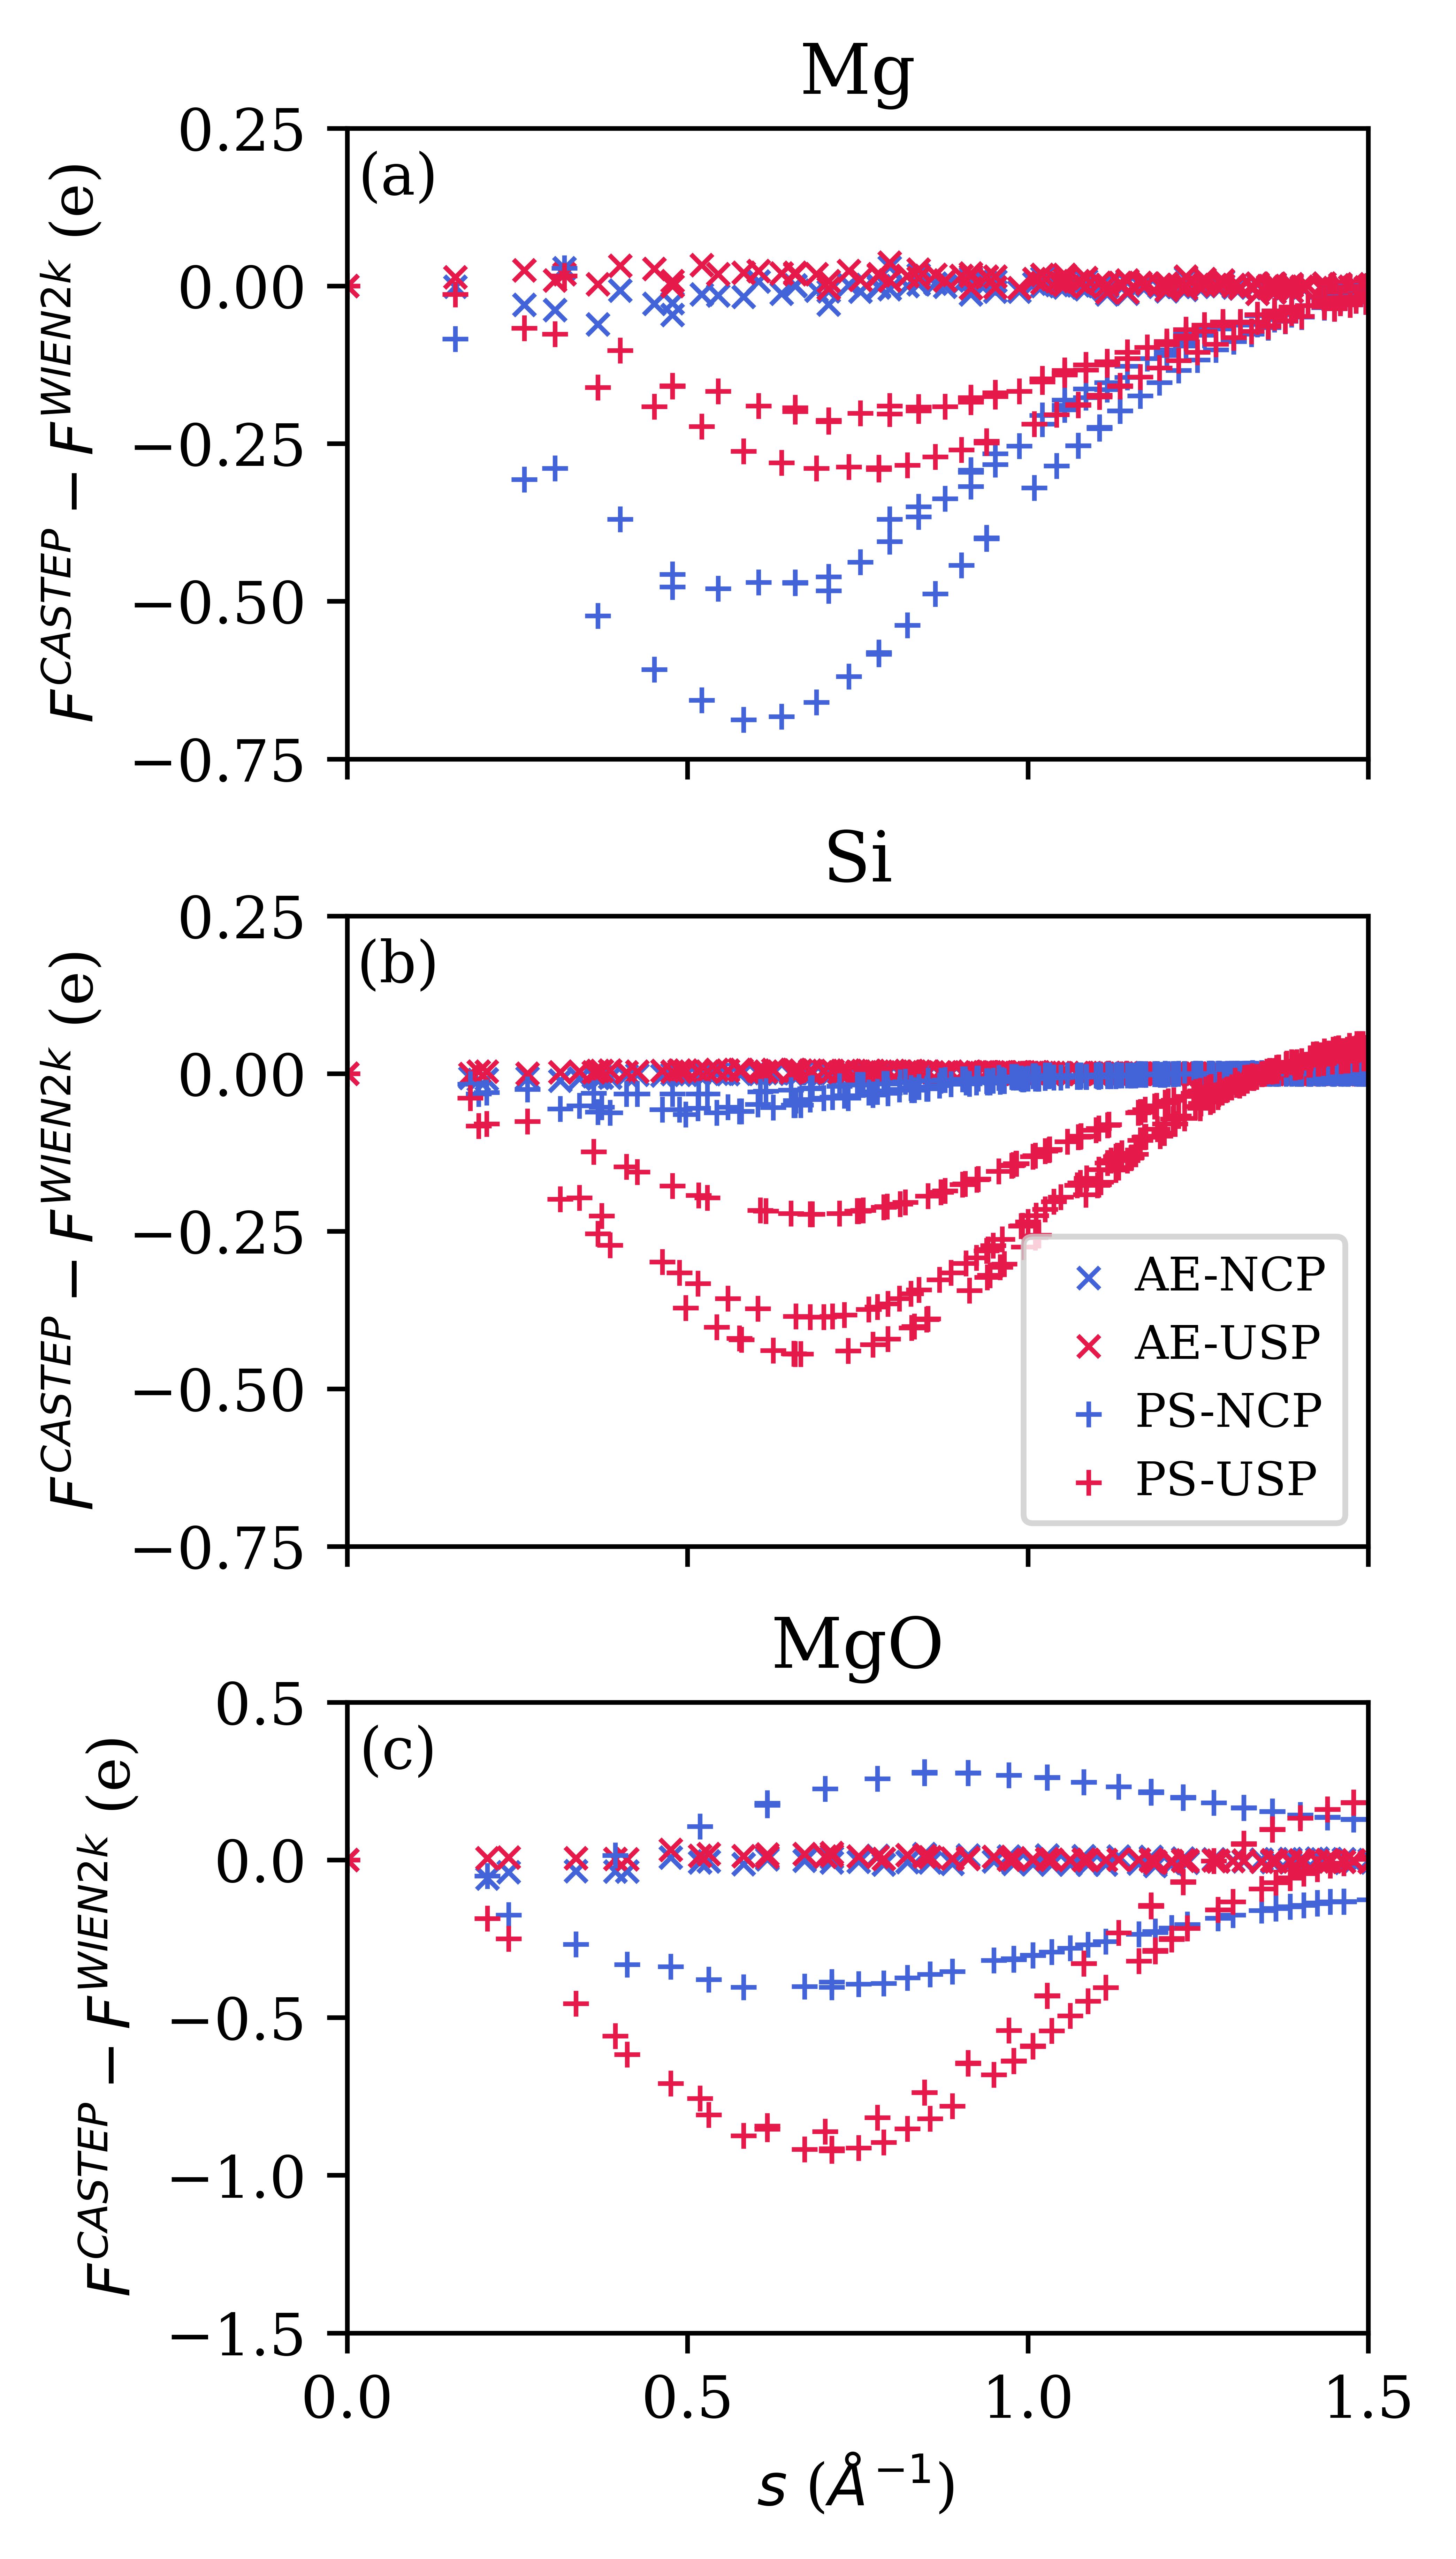

In [11]:
fig, axs = plt.subplots(3,1,figsize=(3.365,6),dpi=1200, sharex = True, constrained_layout=True)
axs[0].scatter(data_Si_PBE_CASTEP[:,3],(data_Si_PBE_CASTEP[:,4]-data_Si_PBE_WIEN2k[:,4]),marker='x',s=14,\
    linewidth=0.8,color=color_dict['blue'])
axs[0].scatter(data_Si_PBE_CASTEP[:,3],(data_Si_PBE_CASTEP[:,5]-data_Si_PBE_WIEN2k[:,4]),marker='x',s=14,\
    linewidth=0.8,color=color_dict['red'])
axs[0].scatter(data_Si_PBE_CASTEP[:,3],(data_Si_PBE_CASTEP[:,6]-data_Si_PBE_WIEN2k[:,4]),marker='+',s=20,\
    linewidth=0.8,color=color_dict['blue'])
axs[0].scatter(data_Si_PBE_CASTEP[:,3],(data_Si_PBE_CASTEP[:,7]-data_Si_PBE_WIEN2k[:,4]),marker='+',s=20,\
    linewidth=0.8,color=color_dict['red'])

axs[0].set_ylabel(r'$F^{CASTEP}  - F^{WIEN2k}$ (e)')
axs[0].set_xlim([0.0,1.5])
axs[0].set_ylim([-0.75,0.25])
axs[0].set_title('Mg')
axs[0].set_yticks([0.25,0.0,-0.25,-0.50,-0.75])


axs[1].scatter(data_Mg_PBE_CASTEP[:,3],(data_Mg_PBE_CASTEP[:,4]-data_Mg_PBE_WIEN2k[:,4]),marker='x',s=14,\
    linewidth=0.8,label='AE-NCP',color=color_dict['blue'])
axs[1].scatter(data_Mg_PBE_CASTEP[:,3],(data_Mg_PBE_CASTEP[:,5]-data_Mg_PBE_WIEN2k[:,4]),marker='x',s=14,\
    linewidth=0.8,label='AE-USP',color=color_dict['red'])
axs[1].scatter(data_Mg_PBE_CASTEP[:,3],(data_Mg_PBE_CASTEP[:,6]-data_Mg_PBE_WIEN2k[:,4]),marker='+',s=20,\
    linewidth=0.8,label='PS-NCP',color=color_dict['blue'])
axs[1].scatter(data_Mg_PBE_CASTEP[:,3],(data_Mg_PBE_CASTEP[:,7]-data_Mg_PBE_WIEN2k[:,4]),marker='+',s=20,\
    linewidth=0.8,label='PS-USP',color=color_dict['red'])

axs[1].legend(loc='lower right', fontsize=8, handletextpad= 0)
axs[1].set_ylabel(r'$F^{CASTEP} - F^{WIEN2k}$ (e)')
axs[1].set_ylim([-0.75,0.25])
axs[1].set_title('Si')
axs[1].set_yticks([0.25,0.0,-0.25,-0.50,-0.75])

axs[2].scatter(data_MgO_PBE_CASTEP[:,3],(data_MgO_PBE_CASTEP[:,4]-data_MgO_PBE_WIEN2k[:,4]),marker='x',s=14,\
    linewidth=0.8,color=color_dict['blue'])
axs[2].scatter(data_MgO_PBE_CASTEP[:,3],(data_MgO_PBE_CASTEP[:,5]-data_MgO_PBE_WIEN2k[:,4]),marker='x',s=14,\
    linewidth=0.8,color=color_dict['red'])
axs[2].scatter(data_MgO_PBE_CASTEP[:,3],(data_MgO_PBE_CASTEP[:,6]-data_MgO_PBE_WIEN2k[:,4]),marker='+',s=20,\
    linewidth=0.8,color=color_dict['blue'])
axs[2].scatter(data_MgO_PBE_CASTEP[:,3],(data_MgO_PBE_CASTEP[:,7]-data_MgO_PBE_WIEN2k[:,4]),marker='+',s=20,\
    linewidth=0.8,color=color_dict['red'])

axs[0].text(0.05, 0.92, r'(a)', horizontalalignment='center',verticalalignment='center', transform=axs[0].transAxes)
axs[1].text(0.05, 0.92, r'(b)', horizontalalignment='center',verticalalignment='center', transform=axs[1].transAxes)
axs[2].text(0.05, 0.92, r'(c)', horizontalalignment='center',verticalalignment='center', transform=axs[2].transAxes)
axs[2].set_title('MgO')

axs[2].set_ylim([-1.5, 0.5])
axs[2].set_yticks([0.50, 0.0, -0.50, -1.00, -1.50])

axs[2].set_ylabel(r'$F^{CASTEP} - F^{WIEN2k}$ (e)')
axs[2].set_xlabel(r'$s$ ($\AA^{-1}$) ')

plt.savefig('Figures/Figure_01.pdf')

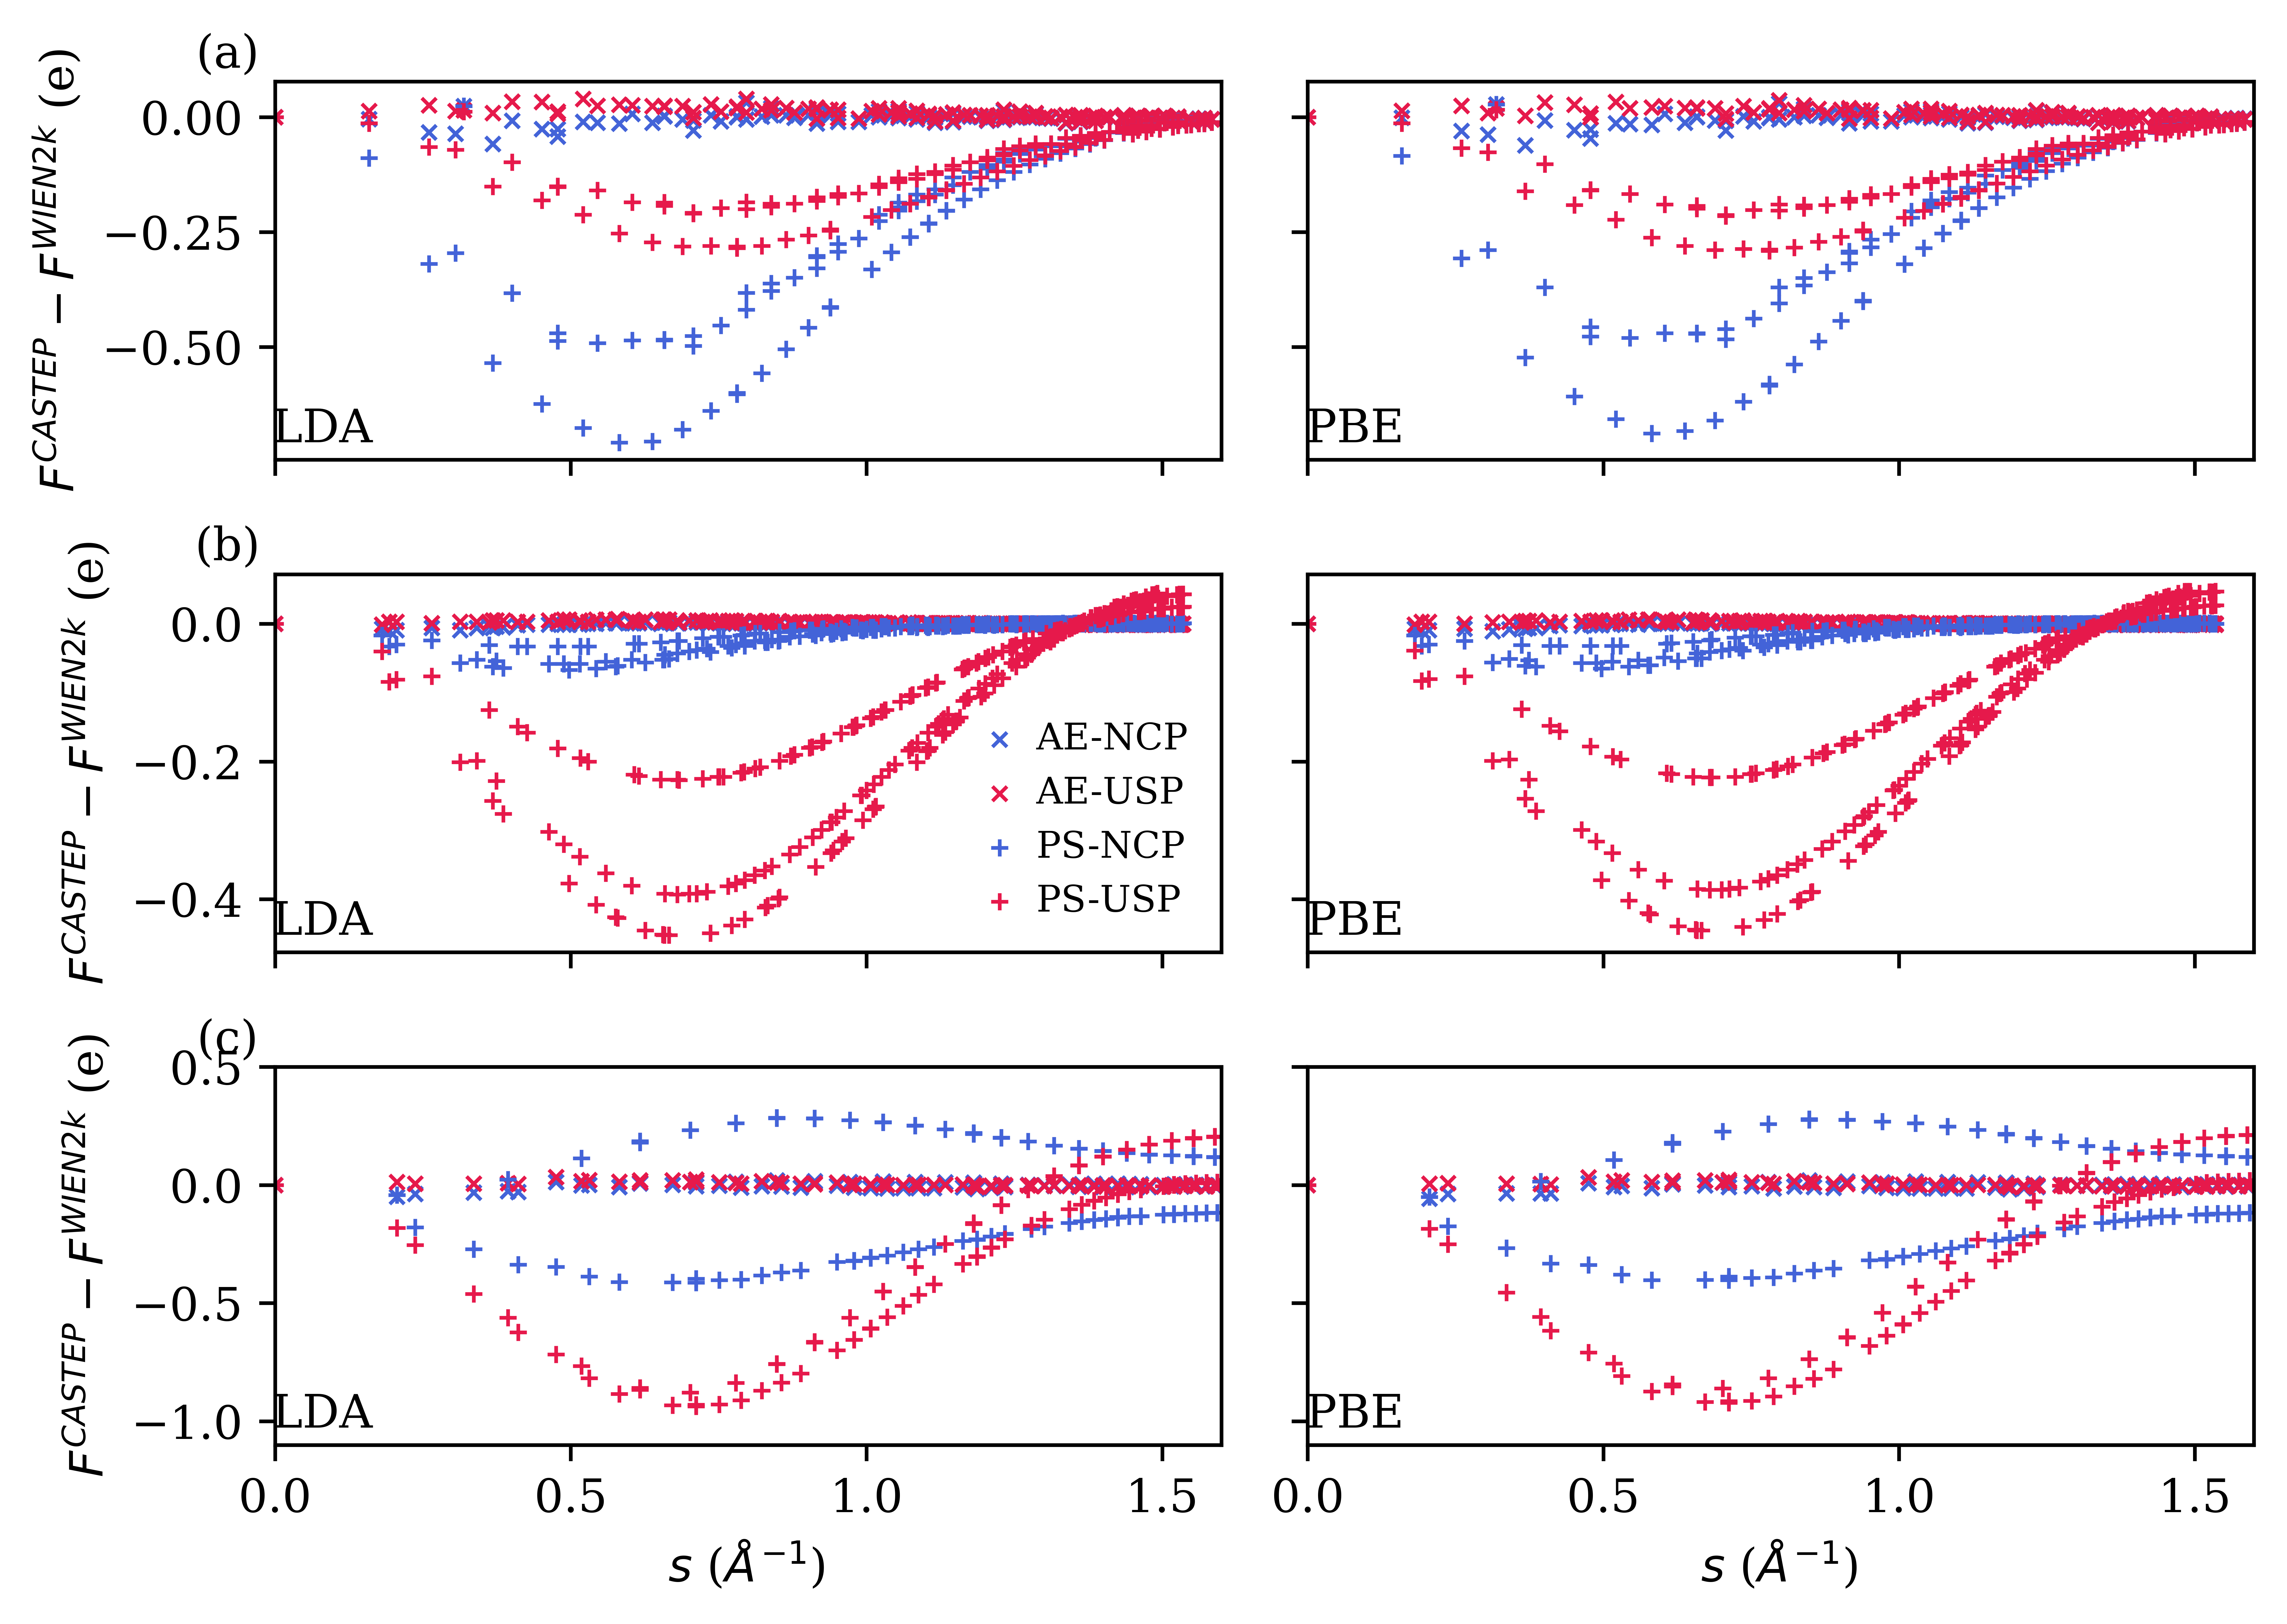

In [12]:
fig, axs = plt.subplots(3,2,figsize=(7,5),dpi=1200, sharex = True, sharey= 'row', tight_layout=True)
axs[0,0].scatter(data_Si_LDA_CASTEP[:,3],(data_Si_LDA_CASTEP[:,4]-data_Si_LDA_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-NCP',color=color_dict['blue'])
axs[0,0].scatter(data_Si_LDA_CASTEP[:,3],(data_Si_LDA_CASTEP[:,5]-data_Si_LDA_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP',color=color_dict['red'])
axs[0,0].scatter(data_Si_LDA_CASTEP[:,3],(data_Si_LDA_CASTEP[:,6]-data_Si_LDA_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-NCP',color=color_dict['blue'])
axs[0,0].scatter(data_Si_LDA_CASTEP[:,3],(data_Si_LDA_CASTEP[:,7]-data_Si_LDA_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP',color=color_dict['red'])

axs[0,0].set_ylabel(r'$F^{CASTEP} - F^{WIEN2k}$ (e)')
axs[0,0].set_xlim([0.0,1.6])


axs[1,0].scatter(data_Mg_LDA_CASTEP[:,3],(data_Mg_LDA_CASTEP[:,4]-data_Mg_LDA_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-NCP',color=color_dict['blue'])
axs[1,0].scatter(data_Mg_LDA_CASTEP[:,3],(data_Mg_LDA_CASTEP[:,5]-data_Mg_LDA_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP',color=color_dict['red'])
axs[1,0].scatter(data_Mg_LDA_CASTEP[:,3],(data_Mg_LDA_CASTEP[:,6]-data_Mg_LDA_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-NCP',color=color_dict['blue'])
axs[1,0].scatter(data_Mg_LDA_CASTEP[:,3],(data_Mg_LDA_CASTEP[:,7]-data_Mg_LDA_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP',color=color_dict['red'])

axs[1,0].legend(loc='lower right', fontsize=8, handletextpad= 0,frameon=False)
axs[1,0].set_ylabel(r'$F^{CASTEP} - F^{WIEN2k}$ (e)')


axs[2,0].scatter(data_MgO_LDA_CASTEP[:,3],(data_MgO_LDA_CASTEP[:,4]-data_MgO_LDA_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-NCP',color=color_dict['blue'])
axs[2,0].scatter(data_MgO_LDA_CASTEP[:,3],(data_MgO_LDA_CASTEP[:,5]-data_MgO_LDA_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP',color=color_dict['red'])
axs[2,0].scatter(data_MgO_LDA_CASTEP[:,3],(data_MgO_LDA_CASTEP[:,6]-data_MgO_LDA_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-NCP',color=color_dict['blue'])
axs[2,0].scatter(data_MgO_LDA_CASTEP[:,3],(data_MgO_LDA_CASTEP[:,7]-data_MgO_LDA_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP',color=color_dict['red'])
axs[2,0].set_ylabel(r'$F^{CASTEP} - F^{WIEN2k}$ (e)')

axs[0,0].text(-0.05, 1.07, r'(a)', horizontalalignment='center',verticalalignment='center', transform=axs[0,0].transAxes)
axs[1,0].text(-0.05, 1.07, r'(b)', horizontalalignment='center',verticalalignment='center', transform=axs[1,0].transAxes)
axs[2,0].text(-0.05, 1.07, r'(c)', horizontalalignment='center',verticalalignment='center', transform=axs[2,0].transAxes)

axs[0,1].scatter(data_Si_PBE_CASTEP[:,3],(data_Si_PBE_CASTEP[:,4]-data_Si_PBE_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-NCP',color=color_dict['blue'])
axs[0,1].scatter(data_Si_PBE_CASTEP[:,3],(data_Si_PBE_CASTEP[:,5]-data_Si_PBE_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP',color=color_dict['red'])
axs[0,1].scatter(data_Si_PBE_CASTEP[:,3],(data_Si_PBE_CASTEP[:,6]-data_Si_PBE_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-NCP',color=color_dict['blue'])
axs[0,1].scatter(data_Si_PBE_CASTEP[:,3],(data_Si_PBE_CASTEP[:,7]-data_Si_PBE_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP',color=color_dict['red'])
axs[0,1].set_xlim([0.0,1.6])


axs[1,1].scatter(data_Mg_PBE_CASTEP[:,3],(data_Mg_PBE_CASTEP[:,4]-data_Mg_PBE_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-NCP',color=color_dict['blue'])
axs[1,1].scatter(data_Mg_PBE_CASTEP[:,3],(data_Mg_PBE_CASTEP[:,5]-data_Mg_PBE_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP',color=color_dict['red'])
axs[1,1].scatter(data_Mg_PBE_CASTEP[:,3],(data_Mg_PBE_CASTEP[:,6]-data_Mg_PBE_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-NCP',color=color_dict['blue'])
axs[1,1].scatter(data_Mg_PBE_CASTEP[:,3],(data_Mg_PBE_CASTEP[:,7]-data_Mg_PBE_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP',color=color_dict['red'])

axs[2,1].scatter(data_MgO_PBE_CASTEP[:,3],(data_MgO_PBE_CASTEP[:,4]-data_MgO_PBE_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-NCP',color=color_dict['blue'])
axs[2,1].scatter(data_MgO_PBE_CASTEP[:,3],(data_MgO_PBE_CASTEP[:,5]-data_MgO_PBE_WIEN2k[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP',color=color_dict['red'])
axs[2,1].scatter(data_MgO_PBE_CASTEP[:,3],(data_MgO_PBE_CASTEP[:,6]-data_MgO_PBE_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-NCP',color=color_dict['blue'])
axs[2,1].scatter(data_MgO_PBE_CASTEP[:,3],(data_MgO_PBE_CASTEP[:,7]-data_MgO_PBE_WIEN2k[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP',color=color_dict['red'])

axs[0,1].text(0.05, 0.08, r'PBE', horizontalalignment='center',verticalalignment='center', transform=axs[0,1].transAxes)
axs[1,1].text(0.05, 0.08, r'PBE', horizontalalignment='center',verticalalignment='center', transform=axs[1,1].transAxes)
axs[2,1].text(0.05, 0.08, r'PBE', horizontalalignment='center',verticalalignment='center', transform=axs[2,1].transAxes)

axs[0,0].text(0.05, 0.08, r'LDA', horizontalalignment='center',verticalalignment='center', transform=axs[0,0].transAxes)
axs[1,0].text(0.05, 0.08, r'LDA', horizontalalignment='center',verticalalignment='center', transform=axs[1,0].transAxes)
axs[2,0].text(0.05, 0.08, r'LDA', horizontalalignment='center',verticalalignment='center', transform=axs[2,0].transAxes)

axs[2,1].set_ylim([-1.1, 0.5])
axs[2,1].set_xlabel(r'$s$ ($\AA^{-1}$) ')
axs[2,0].set_xlabel(r'$s$ ($\AA^{-1}$) ')

plt.savefig('Figures/Figure_S2.pdf')

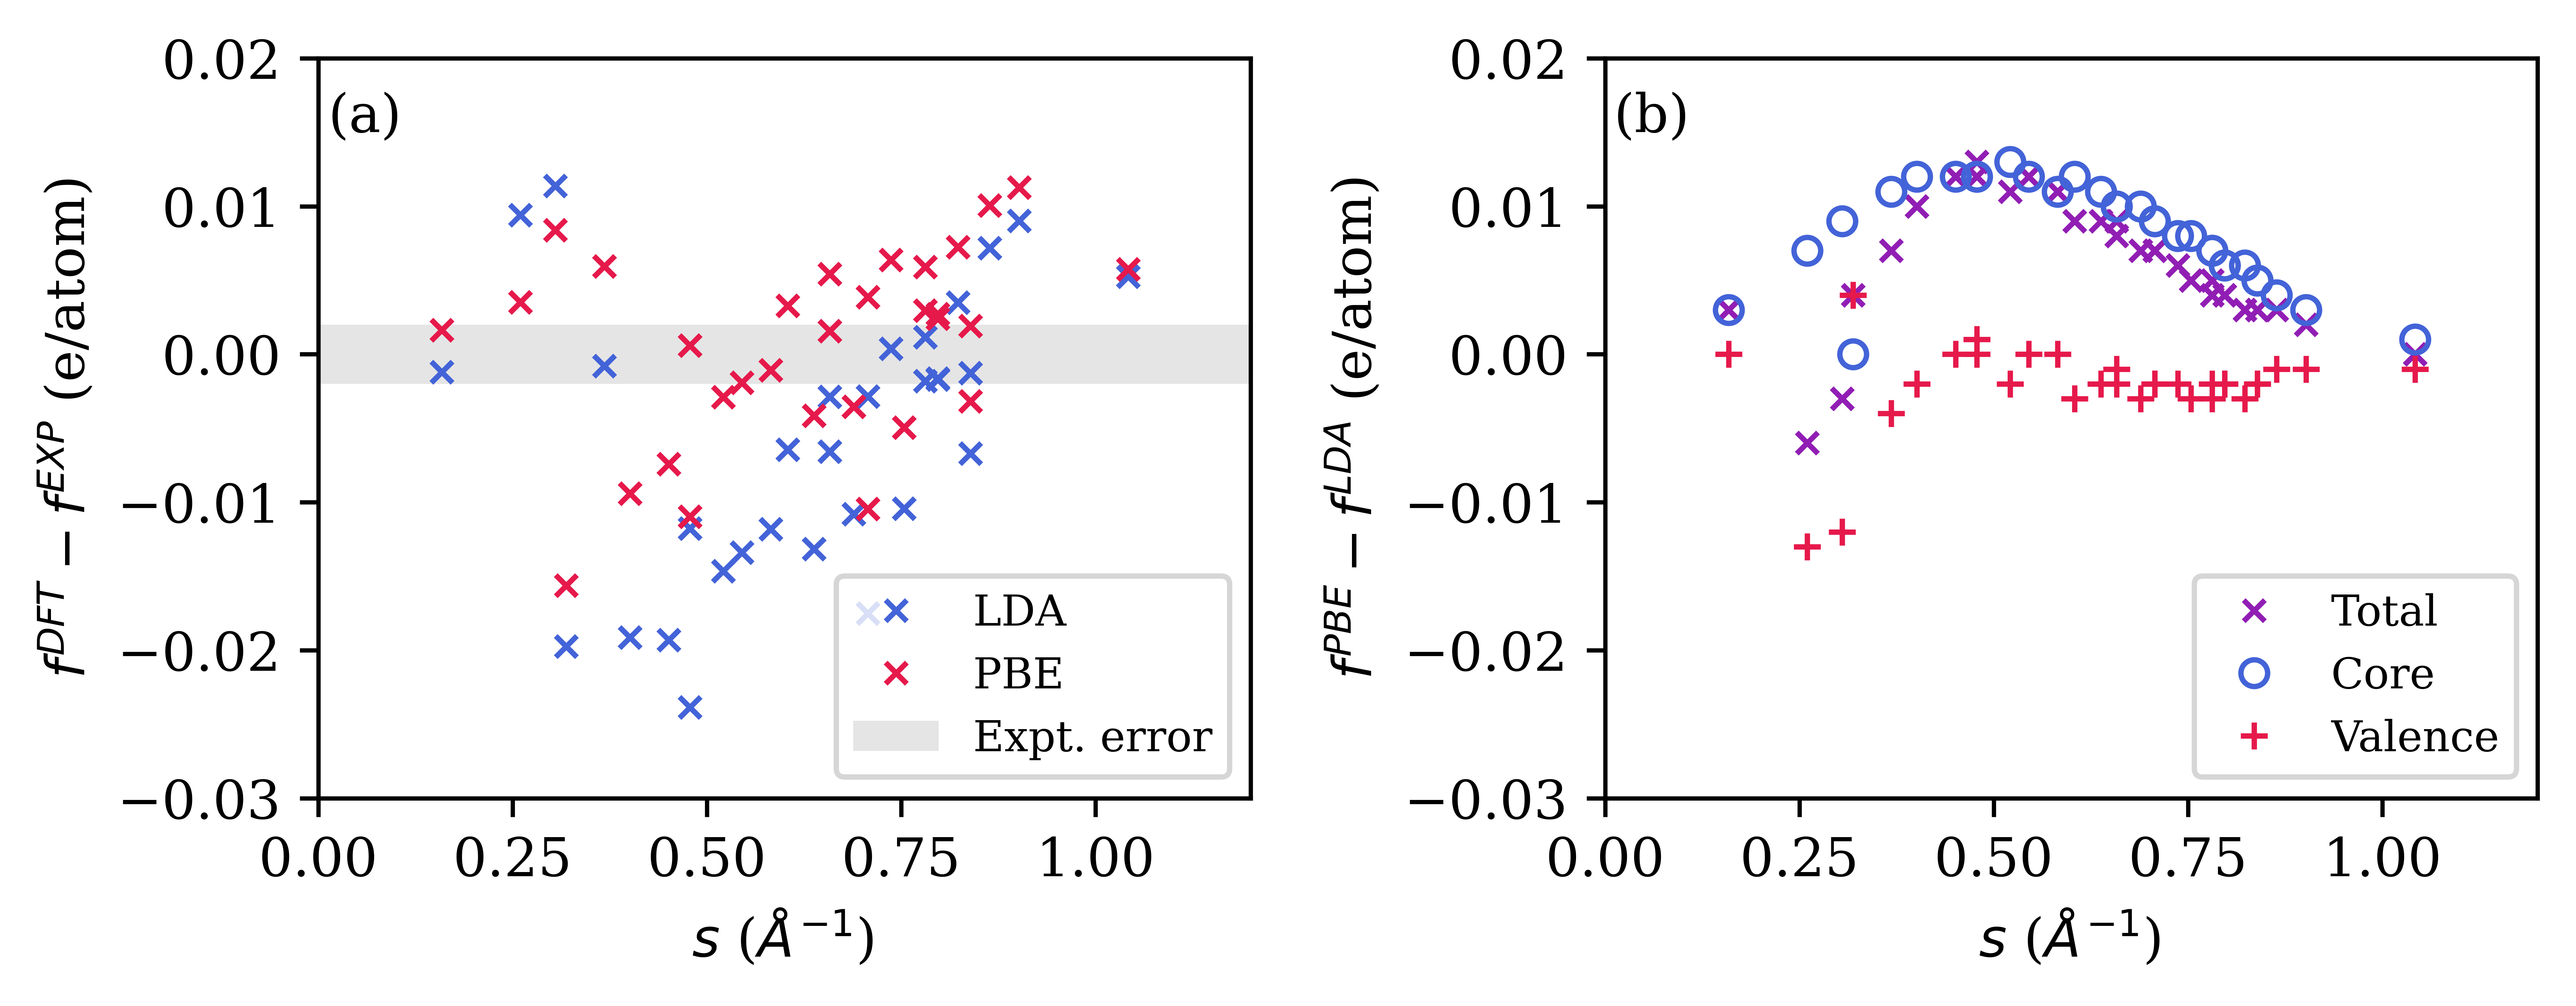

In [15]:
expt_error_avg = np.average(data_Si_EXPT[:,5])
data_Si_core_valence_DFT = np.loadtxt('Data/CASTEP/Si_core_valence_formatted.CASTEP',skiprows=2)

fig, axs = plt.subplots(1,2,figsize=(6.69,2.5),dpi=1200, constrained_layout=True)


axs[0].plot(data_Si_EXPT[:,3],(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],\
        data_Si_LDA_CASTEP[Si_experiment_indices,9])-data_Si_EXPT[:,4]),marker='x',markersize=4,linewidth=0,label='LDA',color=color_dict['blue'])
axs[0].plot(data_Si_EXPT[:,3],(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],\
        data_Si_PBE_CASTEP[Si_experiment_indices,9])-data_Si_EXPT[:,4]),marker='x',markersize=4,linewidth=0,label='PBE',color=color_dict['red'])

# axs[0].errorbar(data_Si_EXPT[:,3],(data_Si_EXPT[:,4]-data_Si_EXPT[:,4]),data_Si_EXPT[:,5],capsize=1.5,linewidth=0.8,color='k',label='Experiment')
axs[0].fill_between([-0.1,1.3],[expt_error_avg,expt_error_avg],[- expt_error_avg, - expt_error_avg],color='tab:gray',\
        edgecolor=None,alpha=0.2,label='Expt. error')

axs[1].plot(data_Si_core_valence_DFT[Si_experiment_indices,3], data_Si_core_valence_DFT[Si_experiment_indices,7]\
         - data_Si_core_valence_DFT[Si_experiment_indices,4],\
                marker='x', markeredgewidth=1.0, markersize=4,markerfacecolor="None",color=color_dict['purple'], linewidth=0,label='Total')

axs[1].plot(data_Si_core_valence_DFT[Si_experiment_indices,3], data_Si_core_valence_DFT[Si_experiment_indices,8] \
         - data_Si_core_valence_DFT[Si_experiment_indices,5],\
                marker='o', markeredgewidth=1.0, markersize=5,markerfacecolor="None",color=color_dict['blue'], linewidth=0,label='Core')

axs[1].plot(data_Si_core_valence_DFT[Si_experiment_indices,3], (data_Si_core_valence_DFT[Si_experiment_indices,7] \
         - data_Si_core_valence_DFT[Si_experiment_indices,4]) - (data_Si_core_valence_DFT[Si_experiment_indices,8] \
                - data_Si_core_valence_DFT[Si_experiment_indices,5]),\
                        marker='+', markeredgewidth=1.0, markersize=5,markerfacecolor="None",color=color_dict['red'], linewidth=0,label='Valence')


axs[1].set_ylim([-0.03,0.02])
axs[1].set_ylabel(r'$f^{PBE} - f^{LDA}$ (e/atom)')
axs[1].set_xlabel(r'$s$ ($\AA^{-1}$) ')

axs[0].set_ylabel(r'$f^{DFT} - f^{EXP}$ (e/atom)')
axs[0].set_xlabel(r'$s$ ($\AA^{-1}$) ')
axs[0].set_ylim([-0.03,0.02])

axs[0].text(0.05, 0.92, r'(a)', horizontalalignment='center',verticalalignment='center', transform=axs[0].transAxes)
axs[1].text(0.05, 0.92, r'(b)', horizontalalignment='center',verticalalignment='center', transform=axs[1].transAxes)
axs[0].set_xlim([0.0,1.2])
axs[1].set_xlim([0.0,1.2])


axs[0].legend(loc='lower right', fontsize=8)
axs[1].legend(loc='lower right', fontsize=8)

plt.savefig('Figures/Figure_02.pdf')

## Figure S3

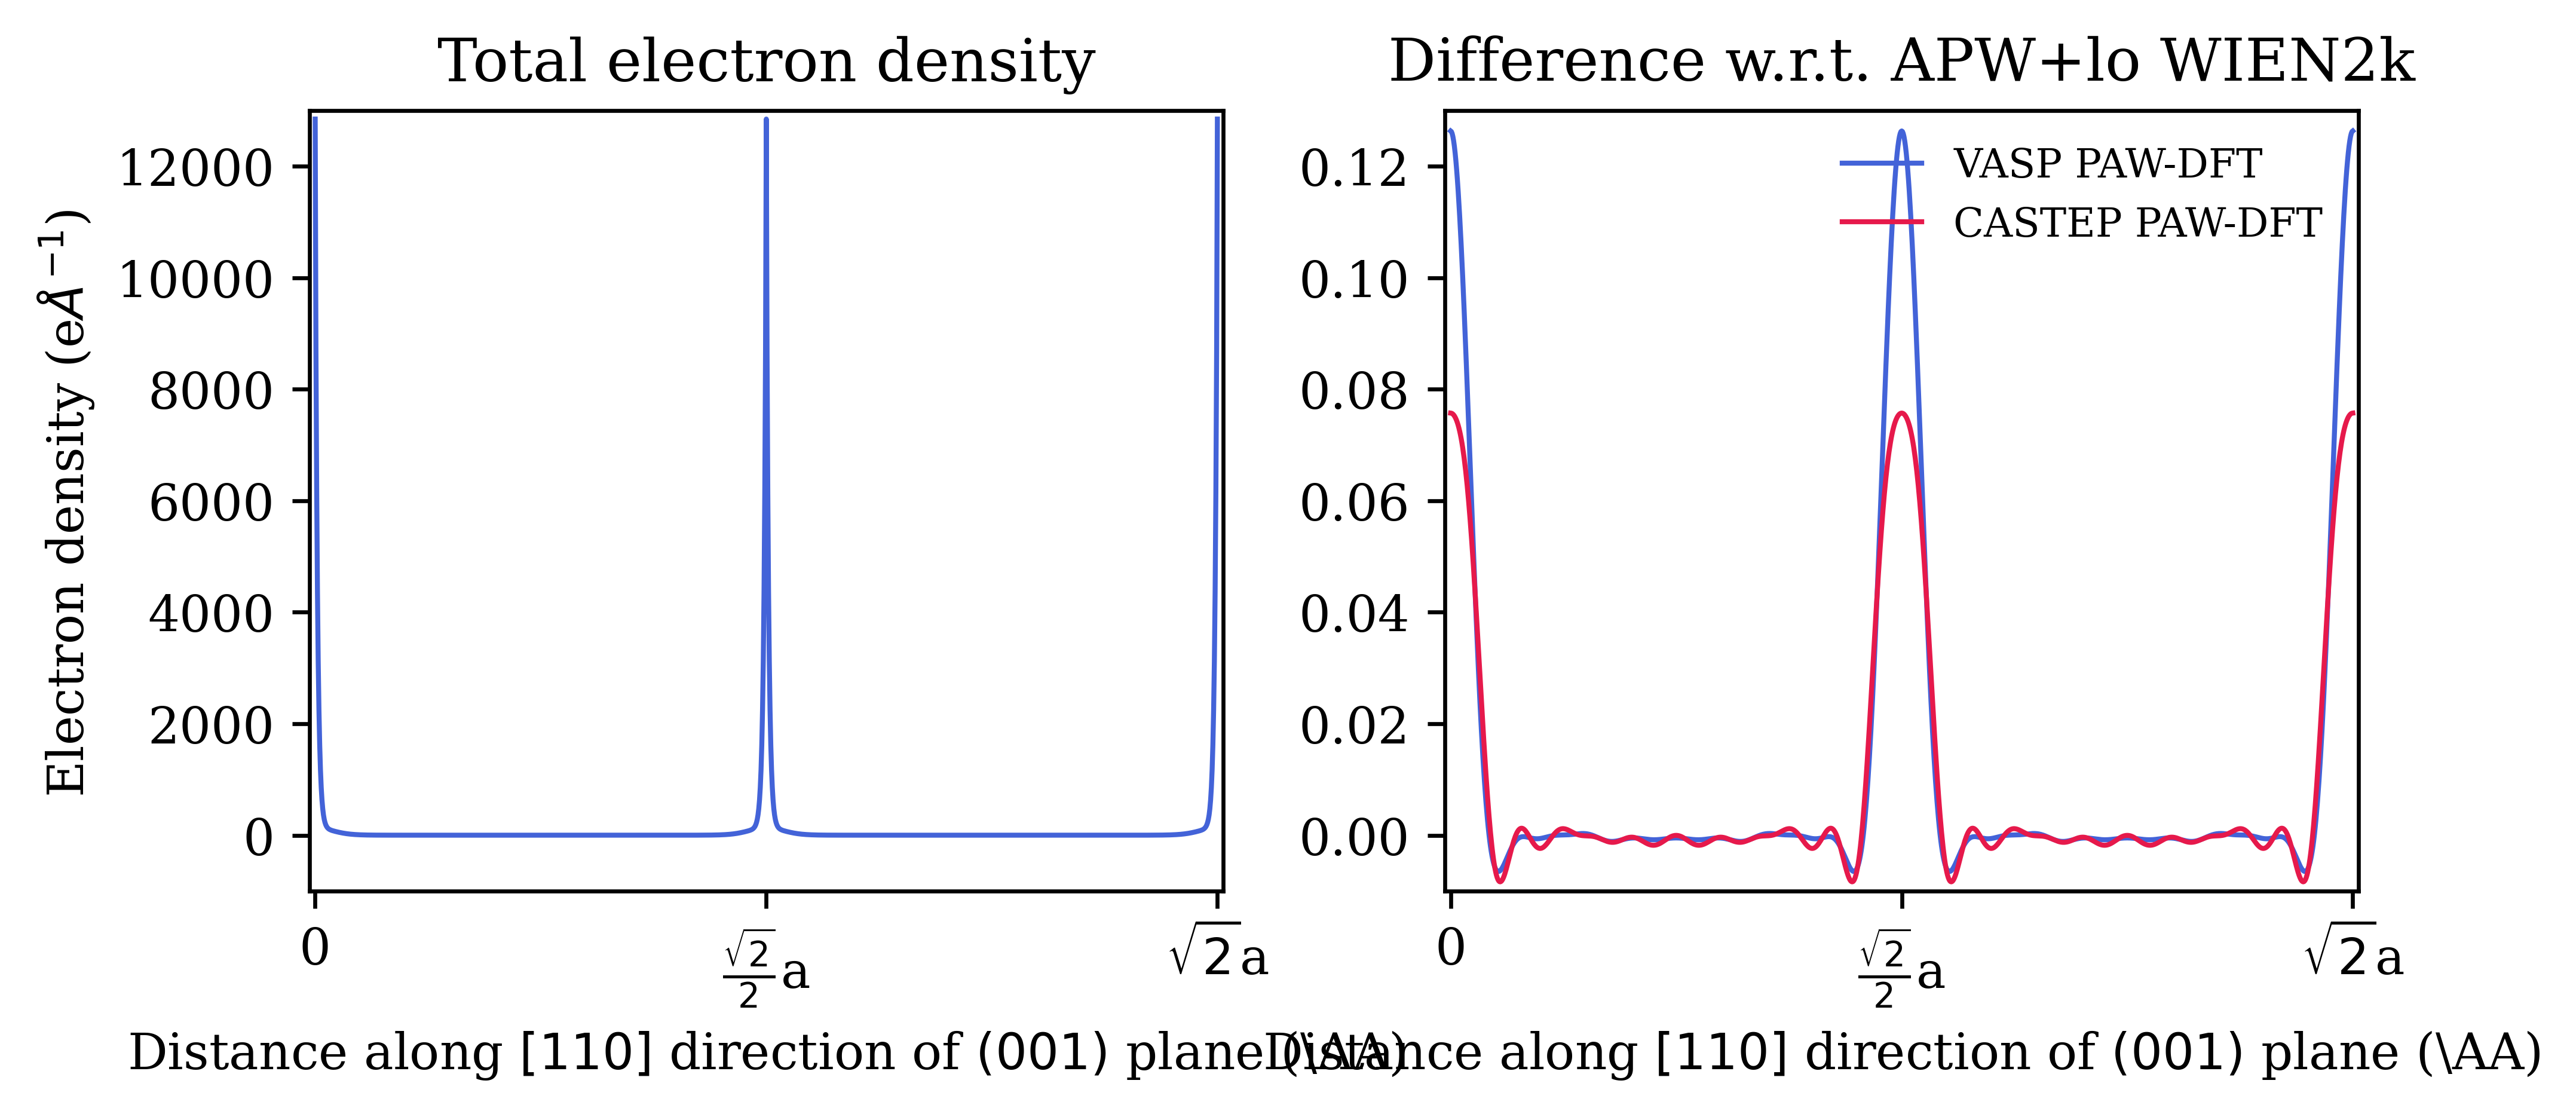

In [19]:
# The electron densities were are saved into Fig_S3_electron_density.npy for VASP, CASTEP and WIEN2k
grid_spacing = np.sqrt(2)*5.4307/1200
ed_final = np.load('Data/Fig_S3_electron_density.npy',allow_pickle=True).item()

for i in ['VASP','CASTEP','WIEN2k']:
    for j in ['100','110','111']:
        ed_final[i][j] += [ed_final[i][j][0]]

x_grid = np.array(list(range(1201)))*grid_spacing


fig, axs = plt.subplots(1,2,figsize=(6.69,3), sharex=True, dpi=600,constrained_layout=True)

# axs[0].plot(x_grid,np.array(ed_final['CASTEP']['110']),linewidth=1)
axs[0].plot(x_grid,np.array(ed_final['VASP']['110']),linewidth=1,color=color_dict['blue'],label='VASP PAW-DFT')
# axs[0].plot(x_grid,np.array(ed_final['WIEN2k']['110']),linewidth=1)
axs[0].set_title('Total electron density')

axs[1].plot(x_grid,np.array(ed_final['VASP']['110']) - np.array(ed_final['WIEN2k']['110']),linewidth=1,color=color_dict['blue'],label='VASP PAW-DFT')
axs[1].plot(x_grid,np.array(ed_final['CASTEP']['110']) - np.array(ed_final['WIEN2k']['110']),linewidth=1,color=color_dict['red'],label='CASTEP PAW-DFT')

axs[1].set_title('Difference w.r.t. APW+lo WIEN2k')

axs[1].legend(fontsize=8,frameon=False)

axs[0].set_ylabel(r'Electron density (e$\AA^{-1}$) ')
axs[0].set_xlabel(r'Distance along $[110]$ direction of $(001)$ plane (\AA)')
axs[1].set_xlabel(r'Distance along $[110]$ direction of $(001)$ plane (\AA)')

axs[0].set_xlim([-0.05,np.sqrt(2)*5.4307 + 0.05])
axs[0].set_ylim(-1000,13000)
axs[1].set_ylim(-0.01,0.13)
axs[0].set_xticks([0,np.sqrt(2)*5.4307/2, np.sqrt(2)*5.4307])
axs[0].set_xticklabels(['0',r'$\frac{\sqrt{2}}{2}$a',r'$\sqrt{2}$a'])



plt.savefig('Figures/Figure_S3.pdf')

## Figure S4

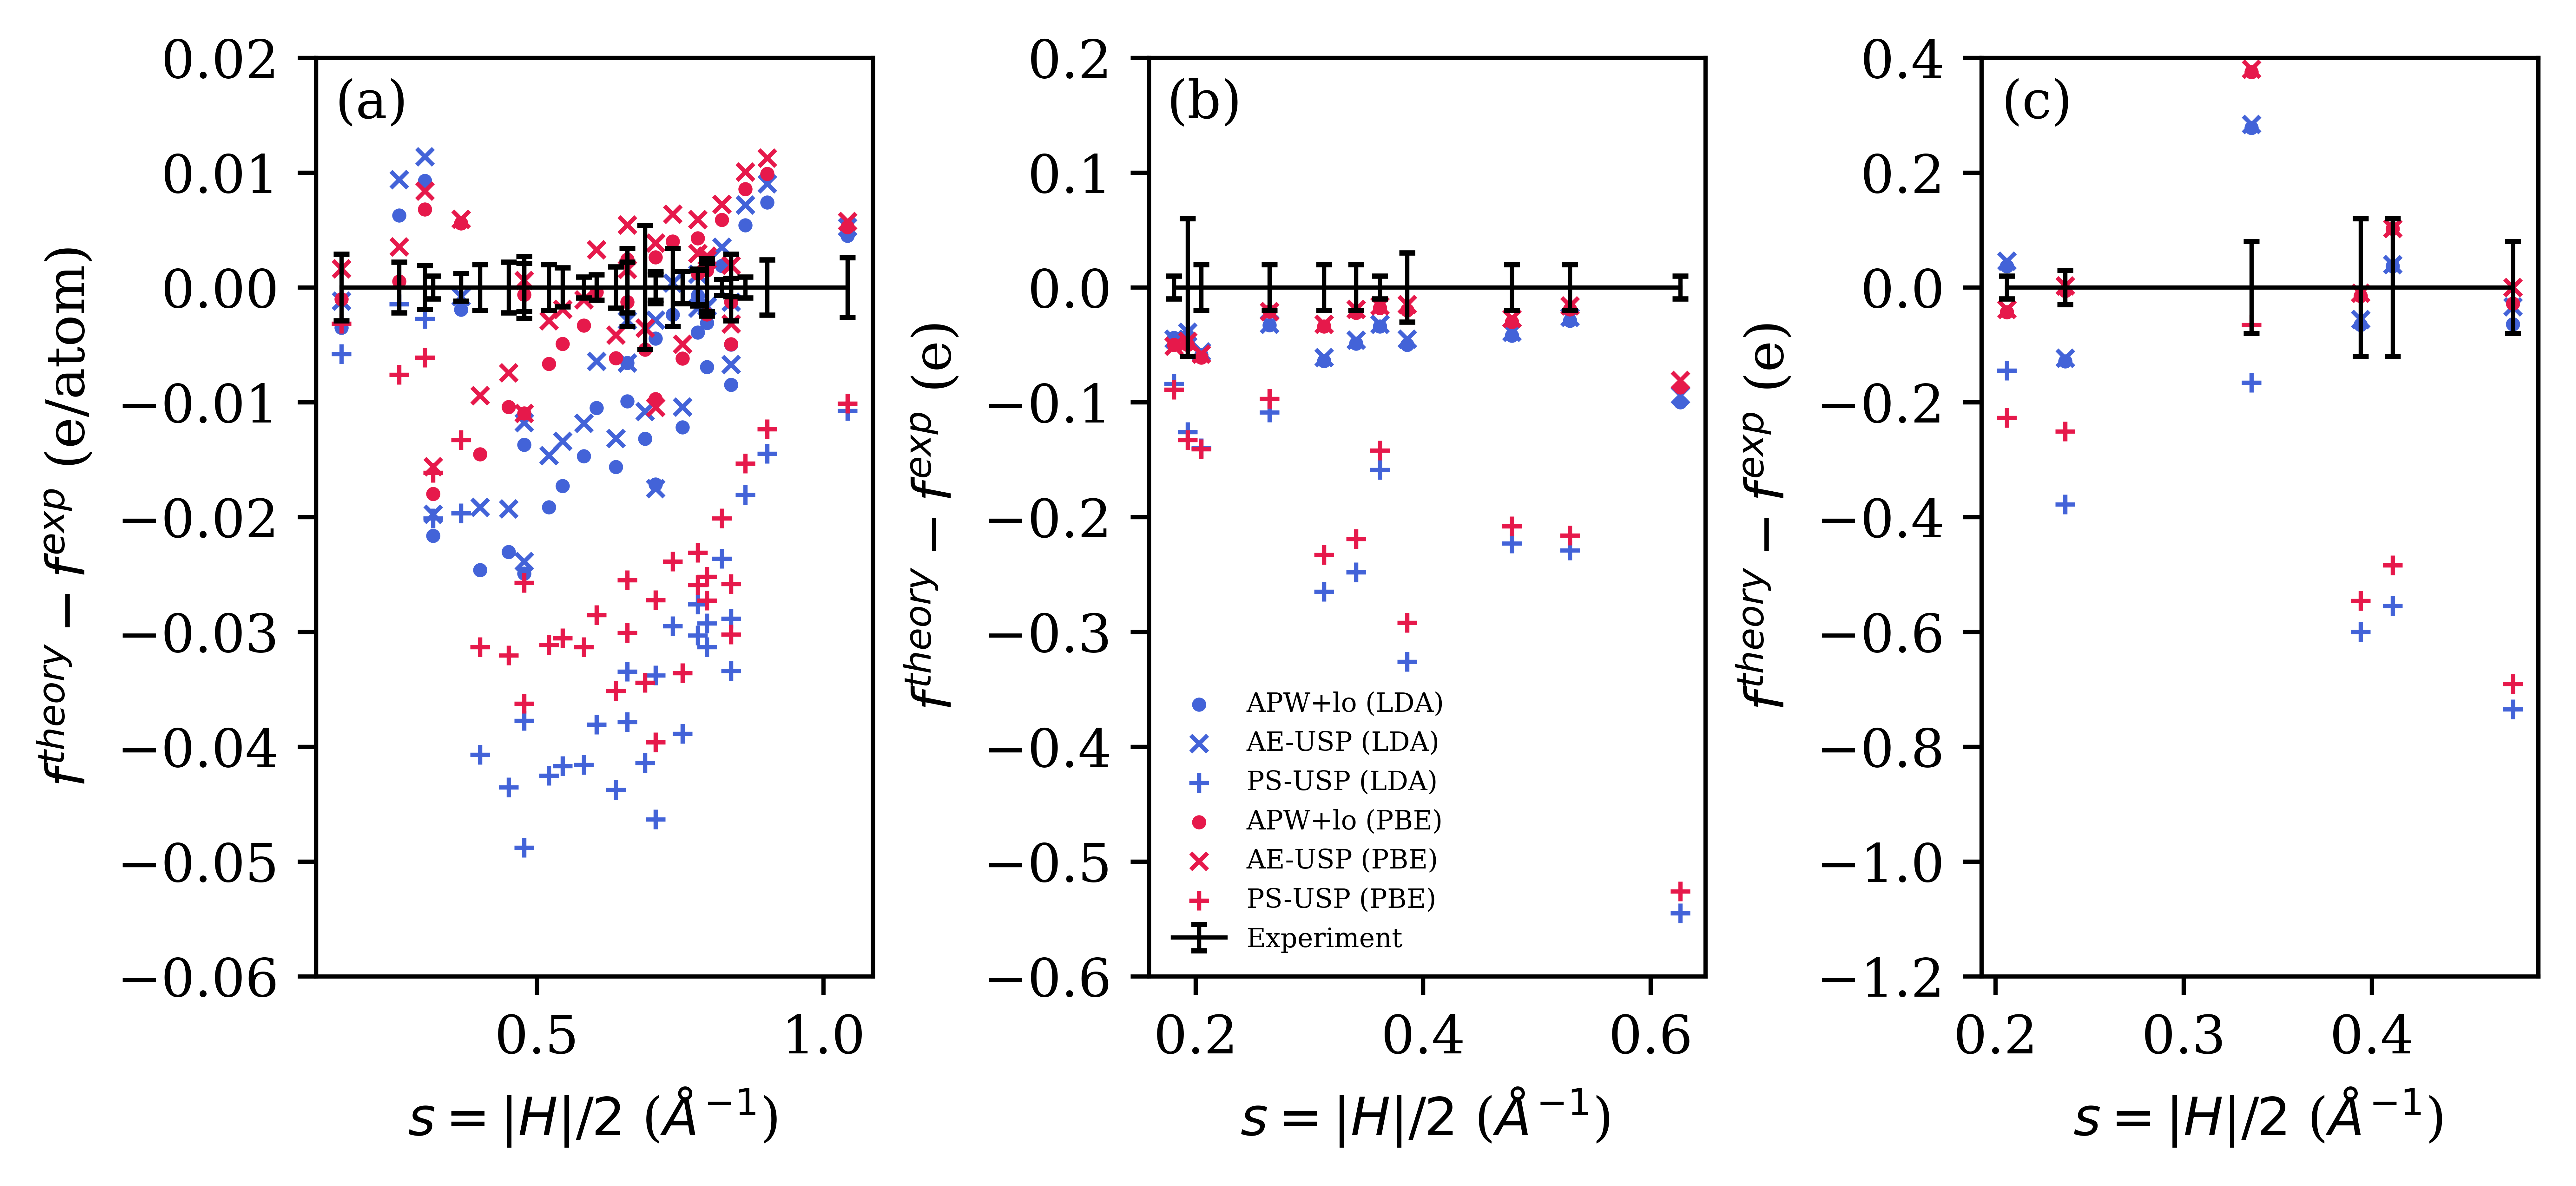

In [25]:
fig, axs = plt.subplots(1,3,figsize=(6.65,3),dpi=1200, constrained_layout=True)

axs[0].errorbar(data_Si_EXPT[:,3],(data_Si_EXPT[:,4]-data_Si_EXPT[:,4]),data_Si_EXPT[:,5],capsize=1.5,linewidth=0.8,color='k',label='Experiment')
axs[0].scatter(data_Si_EXPT[:,3],(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_WIEN2k[Si_experiment_indices,5])-data_Si_EXPT[:,4]),marker='.',s=14,linewidth=0.8,label='APW+lo (LDA)',color=color_dict['blue'])
axs[0].scatter(data_Si_EXPT[:,3],(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_CASTEP[Si_experiment_indices,9])-data_Si_EXPT[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP (LDA)',color=color_dict['blue'])
axs[0].scatter(data_Si_EXPT[:,3],(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_LDA_CASTEP[Si_experiment_indices,11])-data_Si_EXPT[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP (LDA)',color=color_dict['blue'])


axs[0].scatter(data_Si_EXPT[:,3],(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_PBE_WIEN2k[Si_experiment_indices,5])-data_Si_EXPT[:,4]),marker='.',s=14,linewidth=0.8,label='APW+lo (PBE)',color=color_dict['red'])
axs[0].scatter(data_Si_EXPT[:,3],(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_PBE_CASTEP[Si_experiment_indices,9])-data_Si_EXPT[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP (PBE)',color=color_dict['red'])
axs[0].scatter(data_Si_EXPT[:,3],(get_Si_scattering_factor(data_Si_LDA_CASTEP[Si_experiment_indices,:3],data_Si_PBE_CASTEP[Si_experiment_indices,11])-data_Si_EXPT[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP (PBE)',color=color_dict['red'])

axs[0].set_ylabel(r'$f^{ theory} - f^{ exp}$ (e/atom)')
axs[0].set_xlabel(r'$s= |H|/2$ ($\AA^{-1}$) ')
axs[0].set_ylim([-0.06,0.02])

axs[1].errorbar(data_Mg_EXPT[:,3],(data_Mg_EXPT[:,4]-data_Mg_EXPT[:,4]),data_Mg_EXPT[:,5],capsize=1.5,linewidth=0.8,color='k',label='Experiment')
axs[1].scatter(data_Mg_EXPT[:,3],(data_Mg_LDA_WIEN2k[Mg_experiment_indices,5]-data_Mg_EXPT[:,4]),marker='.',s=14,linewidth=0.8,label='APW+lo (LDA)',color=color_dict['blue'])
axs[1].scatter(data_Mg_EXPT[:,3],(data_Mg_LDA_CASTEP[Mg_experiment_indices,9]-data_Mg_EXPT[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP (LDA)',color=color_dict['blue'])
axs[1].scatter(data_Mg_EXPT[:,3],(data_Mg_LDA_CASTEP[Mg_experiment_indices,11]-data_Mg_EXPT[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP (LDA)',color=color_dict['blue'])

axs[1].scatter(data_Mg_EXPT[:,3],(data_Mg_PBE_WIEN2k[Mg_experiment_indices,5]-data_Mg_EXPT[:,4]),marker='.',s=14,linewidth=0.8,label='APW+lo (PBE)',color=color_dict['red'])
axs[1].scatter(data_Mg_EXPT[:,3],(data_Mg_PBE_CASTEP[Mg_experiment_indices,9]-data_Mg_EXPT[:,4]),marker='x',s=10,linewidth=0.8,label='AE-USP (PBE)',color=color_dict['red'])
axs[1].scatter(data_Mg_EXPT[:,3],(data_Mg_PBE_CASTEP[Mg_experiment_indices,11]-data_Mg_EXPT[:,4]),marker='+',s=14,linewidth=0.8,label='PS-USP (PBE)',color=color_dict['red'])

axs[1].legend(loc='lower left',frameon=False,prop={'size': 5})
axs[1].set_ylabel(r'$f^{theory} - f^{exp}$ (e)')
axs[1].set_xlabel(r'$s= |H|/2$ ($\AA^{-1}$) ')
axs[1].set_ylim([-0.6,0.2])

axs[0].text(0.1, 0.95, r'(a)', horizontalalignment='center',verticalalignment='center', transform=axs[0].transAxes)
axs[1].text(0.1, 0.95, r'(b)', horizontalalignment='center',verticalalignment='center', transform=axs[1].transAxes)
axs[2].text(0.1, 0.95, r'(c)', horizontalalignment='center',verticalalignment='center', transform=axs[2].transAxes)

axs[2].errorbar(data_MgO_EXPT[:6,3],(data_MgO_EXPT[:6,4]-data_MgO_EXPT[:6,4]),data_MgO_EXPT[:6,5],capsize=1.5,linewidth=0.8,color='k',label='Experiment')
axs[2].scatter(data_MgO_EXPT[:6,3],(data_MgO_LDA_WIEN2k[MgO_experiment_indices,5]-data_MgO_EXPT[:6,4]),marker='.',s=14,linewidth=0.8,label='APW+lo (LDA)',color=color_dict['blue'])
axs[2].scatter(data_MgO_EXPT[:6,3],(data_MgO_LDA_CASTEP[MgO_experiment_indices,9]-data_MgO_EXPT[:6,4]),marker='x',s=10,linewidth=0.8,label='AE-USP (LDA)',color=color_dict['blue'])
axs[2].scatter(data_MgO_EXPT[:6,3],(data_MgO_LDA_CASTEP[MgO_experiment_indices,11]-data_MgO_EXPT[:6,4]),marker='+',s=14,linewidth=0.8,label='PS-USP (LDA)',color=color_dict['blue'])

axs[2].scatter(data_MgO_EXPT[:6,3],(data_MgO_PBE_WIEN2k[MgO_experiment_indices,5]-data_MgO_EXPT[:6,4]),marker='.',s=14,linewidth=0.8,label='APW+lo (PBE)',color=color_dict['red'])
axs[2].scatter(data_MgO_EXPT[:6,3],(data_MgO_PBE_CASTEP[MgO_experiment_indices,9]-data_MgO_EXPT[:6,4]),marker='x',s=10,linewidth=0.8,label='AE-USP (PBE)',color=color_dict['red'])
axs[2].scatter(data_MgO_EXPT[:6,3],(data_MgO_PBE_CASTEP[MgO_experiment_indices,11]-data_MgO_EXPT[:6,4]),marker='+',s=14,linewidth=0.8,label='PS-USP (PBE)',color=color_dict['red'])

axs[2].set_ylabel(r'$f^{theory} - f^{exp}$ (e)')
axs[2].set_xlabel(r'$s= |H|/2$ ($\AA^{-1}$) ')
axs[2].set_ylim([-1.2,0.4])

plt.savefig('Figures/Figure_S4.pdf')

## Figure S1

/home/shixubenjamin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


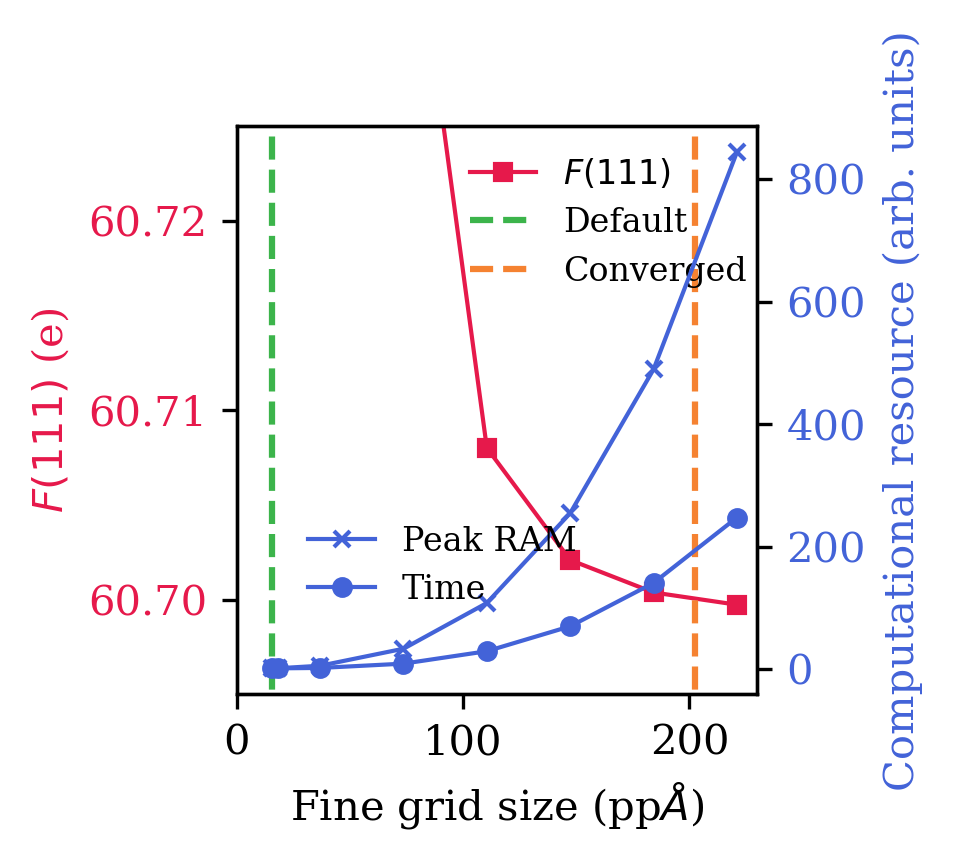

In [26]:

grid_size = [84,100,200,400,600,800,1000,1200]
grid_size_ppa = []
sf_grid_size = []
time_grid_size =[]
ram_grid_size = []


for i in grid_size:
    grid_size_ppa += [i/5.4307]
    with open('Data/VASP/Si_PBE/{0}/OUTCAR'.format(i)) as f:
        a = f.readlines()
        ram_grid_size += [float(a[-6].split()[-1])]
        time_grid_size += [float(a[-8].split()[-1])]

    a = np.loadtxt('Data/VASP/Si_PBE/{0}/sfoutput.output'.format(i))
    sf_grid_size += [float(a[-1])]

fig, ax1 = plt.subplots(figsize=(3.365,2.7), dpi=300,constrained_layout=True)

color = color_dict['red']
ax1.set_xlabel(r'Fine grid size (pp$\AA$)')
ax1.set_ylabel(r'$F(111)$ (e)', color=color)
lns1 = ax1.plot(grid_size_ppa[2:],sf_grid_size[2:], '-s', markersize=4 ,linewidth=1, color=color, label=r'$F(111)$')
ax1.plot([15.4676,15.4676],[60.69,60.75], '--',color=color_dict['green'], linewidth=1.5, label = 'Default')
ax1.plot([202.55, 202.55],[60.69,60.75], '--',color=color_dict['orange'], linewidth=1.5, label = 'Converged')

ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([60.695,60.725])
ax1.set_xlim([0,230])

ax2 = ax1.twinx() 

color = color_dict['blue']
ax2.set_ylabel('Computational resource (arb. units)', color=color)  # we already handled the x-label with ax1
lns2 = ax2.plot(grid_size_ppa,np.array(ram_grid_size)/ram_grid_size[0], '-x', markersize=4, linewidth=1, color=color, label= 'Peak RAM')
lns3 = ax2.plot(grid_size_ppa,np.array(time_grid_size)/time_grid_size[0], '-o',markersize=4, linewidth=1,color=color, label= 'Time')
ax2.tick_params(axis='y', labelcolor=color)

ax2.legend(loc='upper left',bbox_to_anchor=(0.08,0.35), fontsize=8,frameon=False)
ax1.legend(loc='upper left',bbox_to_anchor=(0.39,1.00), fontsize=8, frameon=False)

fig.tight_layout()  
plt.savefig('Figures/Figure_S1.pdf')


## Figure S4

In [27]:
# Table S1 - WIEN2k data is from output3 file. Taken from PBE functional calculations.
import pandas as pd

charge_density = {
    'Si': {
        'LAPW-M': 0,
        'LAPW-I': 0,
        'USP-C': 0,
        'USP-V': 0,
        'USP-A': 0,
        'NCP-C': 0,
        'NCP-V': 0
    },
    'Mg': {
        'LAPW-M': 0,
        'LAPW-I': 0,
        'USP-C': 0,
        'USP-V': 0,
        'USP-A': 0,
        'NCP-C': 0,
        'NCP-V': 0
    },
    'MgO': {
        'LAPW-M': 0,
        'LAPW-I': 0,
        'USP-C': 0,
        'USP-V': 0,
        'USP-A': 0,
        'NCP-C': 0,
        'NCP-V': 0
    }
}

# Give the line number in the .output3 file of the MT and Interstitial charge densities - found manually.

wien2k_charge_index = {
    'Si': [29,133,269],
    'Mg': [29,133,239],
    'MgO': [29,140,268]
}

for i in materials_systems:
    with open('Data/WIEN2k/{0}_PBE/{0}_PBE.output3'.format(i)) as f:
        a = f.readlines()
        if i == 'Si':
            charge_density[i]['LAPW-M'] = (float(a[wien2k_charge_index[i][0]-1].split()[4]) + float(a[wien2k_charge_index[i][1]-1].split()[4]))*4
            charge_density[i]['LAPW-I'] = (float(a[wien2k_charge_index[i][2]-1].split()[3]))*4
        elif i == 'Mg':
            charge_density[i]['LAPW-M'] = (float(a[wien2k_charge_index[i][0]-1].split()[4]) + float(a[wien2k_charge_index[i][1]-1].split()[4]))
            charge_density[i]['LAPW-I'] = (float(a[wien2k_charge_index[i][2]-1].split()[3]))   
        elif i == 'MgO':
            charge_density[i]['LAPW-M'] = (float(a[wien2k_charge_index[i][0]-1].split()[4]) + float(a[wien2k_charge_index[i][1]-1].split()[4]))*4
            charge_density[i]['LAPW-I'] = (float(a[wien2k_charge_index[i][2]-1].split()[3]))*4
    a = np.loadtxt('Data/CASTEP/{0}_PBE/{0}_PBE_USP_without_DW.xrd_sf'.format(i),skiprows=1)[0]
    charge_density[i]['USP-C'] = a[9]
    charge_density[i]['USP-V'] = a[11]
    charge_density[i]['USP-A'] = a[13]
    a = np.loadtxt('Data/CASTEP/{0}_PBE/{0}_PBE_NCP_without_DW.xrd_sf'.format(i),skiprows=1)[0]
    charge_density[i]['NCP-C'] = a[9]
    charge_density[i]['NCP-V'] = a[11]


df1 = pd.DataFrame(charge_density)
rounded_df1 = df1.round(decimals=2).T
print(rounded_df1)


     LAPW-M  LAPW-I  USP-C  USP-V  USP-A  NCP-C  NCP-V
Si    98.68   13.32   80.0  32.35  -0.35   80.0   32.0
Mg    21.56    2.44    4.0   7.41  12.59   20.0    4.0
MgO   74.56    5.44   16.0  37.67  26.33   48.0   32.0


In [28]:
# Table S2 - Considering the case of Hirshfeld charge stuff

r_factor_hirsh_vs_avg = {
    'Average': get_R_factor(data_MgO_EXPT[:6,4],data_MgO_PBE_CASTEP[MgO_experiment_indices,12]),
    'Hirshfeld': get_R_factor(data_MgO_EXPT[:6,4],data_MgO_PBE_CASTEP[MgO_experiment_indices,9])
}

print(r_factor_hirsh_vs_avg)


{'Average': 0.33466755614854365, 'Hirshfeld': 0.29686457638425856}


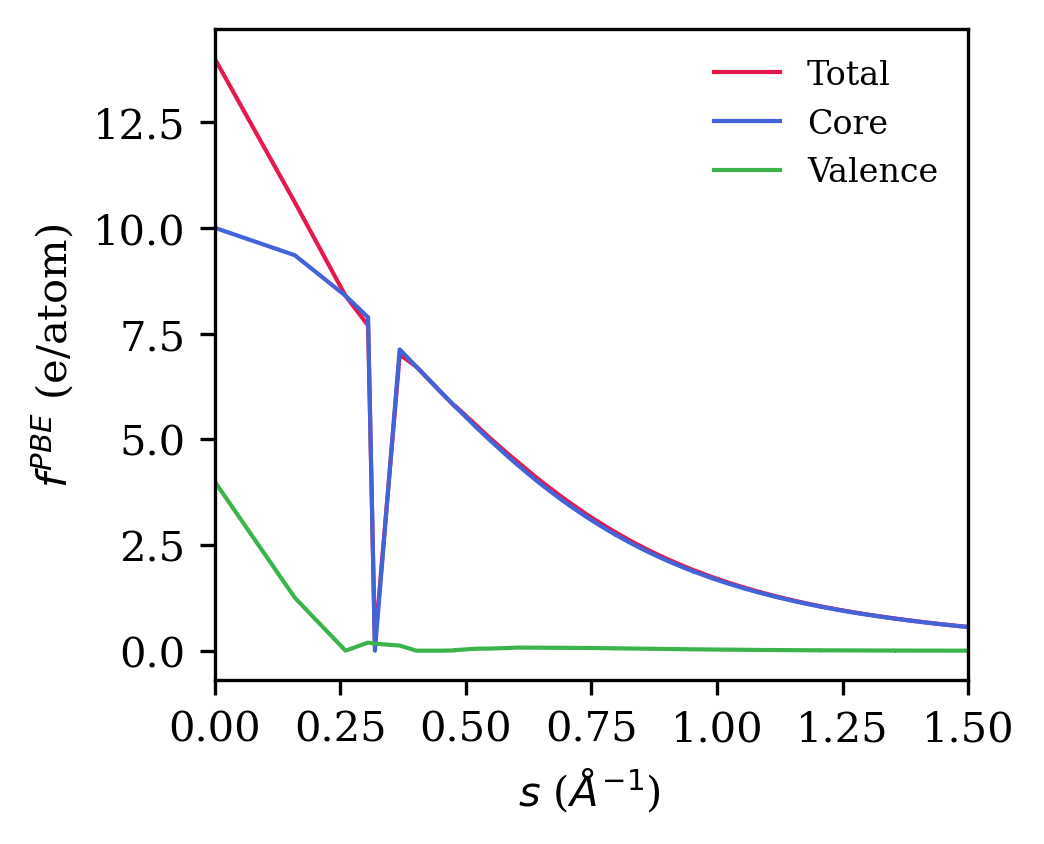

In [29]:
# Figure S4 Considering the valence and core contributions to the contribution of Si.

functional = 'PBE'
a = np.loadtxt('Data/CASTEP/Si_{0}/Si_{0}_USP_with_DW.xrd_sf'.format(functional),skiprows=1)
core_sf = []
total_sf = []
val_sf = []
ae_val_sf = []
length = []

for i in range(len(a)):
    length += [np.sqrt(a[i,0]**2 + a[i,1]**2 + a[i,2]**2)/(2*5.4307) ]
    total_sf += [a[i,3]+ 1j*a[i,4]]
    core_sf += [a[i,9] + 1j*a[i,10]]
    val_sf += [a[i,11] + a[i,13] + 1j*a[i,12] + 1j*a[i,14]]
scatter_val = get_Si_scattering_factor(a[:,:3],val_sf)
scatter_core = get_Si_scattering_factor(a[:,:3],core_sf)
scatter_total = get_Si_scattering_factor(a[:,:3],total_sf)

fig, axs = plt.subplots(figsize=(3.365,2.7), dpi=300,constrained_layout=True)

axs.plot(length,scatter_total,linewidth=1, color=color_dict['red'],label='Total')
axs.plot(length,scatter_core,linewidth=1, color=color_dict['blue'],label='Core')
axs.plot(length,scatter_val,linewidth=1, color=color_dict['green'],label='Valence')

axs.set_xlim([0.0,1.5])
axs.set_ylabel(r'$f^{PBE}$ (e/atom)')
axs.set_xlabel(r'$s$ ($\AA^{-1}$) ')


axs.legend(fontsize=8,frameon=False)

plt.savefig('Figures/Figure_S4.pdf')
